In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = ['center', 'center', 'center', 'center']

In [21]:
target_cols_ratio = [3, 3, 3, 3,]

In [22]:
target_cols_kde = ['총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde',]

In [23]:
csv_path = './output/대사기능_지질대사.csv'

In [24]:
model_path_man = './model/0802_man.pkl'

In [25]:
model_path_woman = './model/0802_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        
#         '공복시혈당(FBS)', '중성지방(TG)', '요당 (Gluco)', '당화혈색소 (HbA1c)',
        '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)',
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224,73,139,98
1,2010,7490,3638,1,39,265,57,187.4,103
2,2010,7915,3997,1,36,196,37,50,547
3,2010,8056,4745,1,42,310,53,181.4,378
4,2010,8457,3929,1,38,189,50,108,154


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1213899 non-null  object
 1   UID        1213899 non-null  int64 
 2   CU_REC_ID  1213899 non-null  int64 
 3   SEX        1213899 non-null  int64 
 4   검진당시나이     1213899 non-null  int64 
 5   총콜레스테롤     1108951 non-null  object
 6   HDL-콜레스테롤  1108846 non-null  object
 7   LDL-콜레스테롤  1100320 non-null  object
 8   중성지방(TG)   1109130 non-null  object
dtypes: int64(4), object(5)
memory usage: 83.4+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)'],
      dtype='object')

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [34]:
df.isnull().sum()

검진년도              0
UID               0
CU_REC_ID         0
SEX               0
검진당시나이            0
총콜레스테롤       104948
HDL-콜레스테롤    105053
LDL-콜레스테롤    113579
중성지방(TG)     104769
dtype: int64

In [35]:
df_group = df.groupby(['UID', '검진년도'])

In [36]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [37]:
temp

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [38]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 총콜레스테롤
column : HDL-콜레스테롤
column : LDL-콜레스테롤
column : 중성지방(TG)
2488.94416 sec


In [39]:
df.isnull().sum()

검진년도             0
UID              0
CU_REC_ID        0
SEX              0
검진당시나이           0
총콜레스테롤       61595
HDL-콜레스테롤    61904
LDL-콜레스테롤    70529
중성지방(TG)     61551
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [40]:
numeric_col = df.columns

In [41]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   총콜레스테롤     1151191 non-null  float64
 6   HDL-콜레스테롤  1146478 non-null  float64
 7   LDL-콜레스테롤  1141538 non-null  float64
 8   중성지방(TG)   1147041 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [43]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.151191e+06,1.146478e+06,1.141538e+06,1.147041e+06
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,1.999425e+02,5.839979e+01,1.202473e+02,1.224728e+02
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,3.738881e+01,2.054792e+01,3.426813e+01,9.417363e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,-3.070000e+02,0.000000e+00
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.750000e+02,4.700000e+01,9.700000e+01,6.800000e+01
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,1.980000e+02,5.600000e+01,1.186000e+02,9.800000e+01
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,2.230000e+02,6.700000e+01,1.420000e+02,1.480000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.230000e+03,9.998000e+03,1.129000e+03,6.110000e+03


In [44]:
df_result = df.copy()

# 이상치 제거

In [45]:
len(df_result)

1213899

In [46]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [47]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [48]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 103.0 maximum : 295.0
총콜레스테롤 : 1213899 / IQR outliers:  15563 / ratio : 0.012820671242006131

minimum : 17.0 maximum : 97.0
HDL-콜레스테롤 : 1213899 / IQR outliers:  18846 / ratio : 0.01552517960719961

minimum : 29.5 maximum : 209.5
LDL-콜레스테롤 : 1213899 / IQR outliers:  12453 / ratio : 0.010258678852194458

minimum : -52.0 maximum : 268.0
중성지방(TG) : 1213899 / IQR outliers:  63028 / ratio : 0.051921947377829625



In [49]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [50]:
minimums

[103.0, 17.0, 29.5, -52.0]

In [51]:
maximums

[295.0, 97.0, 209.5, 268.0]

In [52]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117251 entries, 0 to 1117250
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1117251 non-null  int64  
 1   UID        1117251 non-null  int64  
 2   CU_REC_ID  1117251 non-null  int64  
 3   SEX        1117251 non-null  int64  
 4   검진당시나이     1117251 non-null  int64  
 5   총콜레스테롤     1054882 non-null  float64
 6   HDL-콜레스테롤  1049937 non-null  float64
 7   LDL-콜레스테롤  1046300 non-null  float64
 8   중성지방(TG)   1050484 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 76.7 MB


In [53]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0
2,2010,8457,3929,1,38,189.0,50.0,108.0,154.0
3,2010,8634,4751,1,43,176.0,54.0,94.8,136.0
4,2010,11158,1703,1,37,185.0,51.0,99.8,171.0


In [54]:
len(df_result)

1117251

In [55]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117251 entries, 0 to 1117250
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1117251 non-null  int64  
 1   UID        1117251 non-null  int64  
 2   CU_REC_ID  1117251 non-null  int64  
 3   SEX        1117251 non-null  int64  
 4   검진당시나이     1117251 non-null  int64  
 5   총콜레스테롤     1054882 non-null  float64
 6   HDL-콜레스테롤  1049937 non-null  float64
 7   LDL-콜레스테롤  1046300 non-null  float64
 8   중성지방(TG)   1050484 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 76.7 MB


In [56]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
count,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.054882e+06,1.049937e+06,1.046300e+06,1.050484e+06
mean,2.021877e+03,5.090528e+05,1.491787e+06,1.381485e+00,4.061001e+01,1.973057e+02,5.833886e+01,1.198250e+02,1.070897e+02
std,1.698775e+00,3.653516e+05,7.931390e+05,4.857513e-01,8.962131e+00,3.382002e+01,1.368987e+01,3.182821e+01,5.272999e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.030000e+02,1.700000e+01,2.990000e+01,2.000000e+00
25%,2.021000e+03,2.212830e+05,6.809515e+05,1.000000e+00,3.400000e+01,1.740000e+02,4.800000e+01,9.700000e+01,6.600000e+01
50%,2.022000e+03,3.809730e+05,1.411482e+06,1.000000e+00,4.000000e+01,1.960000e+02,5.700000e+01,1.190000e+02,9.400000e+01
75%,2.023000e+03,8.362450e+05,2.173996e+06,2.000000e+00,4.800000e+01,2.200000e+02,6.700000e+01,1.410000e+02,1.370000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.950000e+02,9.700000e+01,2.095000e+02,2.680000e+02


# target (건강지수) 계산

In [57]:
len(df_result)

1117251

## Linear Regression coefficient 계산

In [58]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [59]:
# target_cols

In [60]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [61]:
# df_man[df_man['target'].isna()]

In [62]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [63]:
# df_target = pd.concat([df_man, df_woman])

In [64]:
# len(df_target)

In [65]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [66]:
# len(df_target)

In [67]:
# df_target[df_target['target'].isna()]

In [68]:
# df_target.info()

In [69]:
# df_target.head()

In [70]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [71]:
# len(df_target)

In [72]:
# df_target.describe()

In [73]:
# df_target[df_target['target'] == 50]

In [74]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [75]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [76]:
# len(df_target)

In [77]:
# df_target.head()

In [78]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

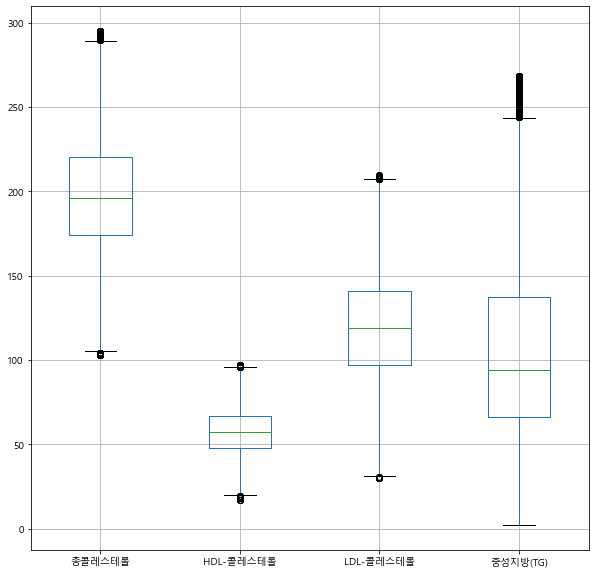

In [79]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [80]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0
2,2010,8457,3929,1,38,189.0,50.0,108.0,154.0
3,2010,8634,4751,1,43,176.0,54.0,94.8,136.0
4,2010,11158,1703,1,37,185.0,51.0,99.8,171.0


In [81]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [82]:
len(target_cols)

4

In [83]:
target_cols_direction

['center', 'center', 'center', 'center']

In [84]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    # 파생요소 때문에 1을 추가
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols) + 1):(5+len(cols) + 1 + len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [85]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

873.59162 sec


## 검진 항목 별 가중치 

In [86]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,99.96
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,72.15
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.27
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,122.52
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,124.73


In [87]:
target_cols_kde

['총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde']

In [88]:
target_cols_ratio

[3, 3, 3, 3]

In [89]:
sum(target_cols_ratio)

12

In [90]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117251 entries, 291764 to 165818
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1117251 non-null  int64  
 1   UID            1117251 non-null  int64  
 2   CU_REC_ID      1117251 non-null  int64  
 3   SEX            1117251 non-null  int64  
 4   검진당시나이         1117251 non-null  int64  
 5   총콜레스테롤         1054882 non-null  float64
 6   HDL-콜레스테롤      1049937 non-null  float64
 7   LDL-콜레스테롤      1046300 non-null  float64
 8   중성지방(TG)       1050484 non-null  float64
 9   총콜레스테롤_kde     1117251 non-null  float64
 10  HDL-콜레스테롤_kde  1117251 non-null  float64
 11  LDL-콜레스테롤_kde  1117251 non-null  float64
 12  중성지방(TG)_kde   1117251 non-null  float64
 13  kde_mean       1117251 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 127.9 MB


In [91]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
) / sum(target_cols_ratio)

In [92]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [93]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [94]:
df_target['kde_mean'].min()

2.4

In [95]:
df_target['kde_mean'].max()

149.99

In [96]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean
19,2019,153543,325845,1,20,171.2,54.2,107.4,46.9,142.08,131.75,131.74,88.75,123.58
17,2019,152079,325977,1,20,169.0,33.0,128.0,144.0,145.00,15.08,62.33,18.09,60.12
40,2019,392728,325980,1,20,181.0,51.0,116.0,60.0,128.37,117.44,98.90,144.50,122.30
42,2019,438481,325982,1,20,135.0,57.0,58.0,63.0,69.92,147.93,36.79,149.45,101.02
43,2019,439691,326889,1,20,200.0,77.0,111.0,61.0,85.21,17.08,119.34,146.70,92.08
18,2019,153352,327360,1,20,170.0,68.0,91.0,53.0,143.65,42.50,150.00,117.63,113.44
13,2019,130234,328771,1,20,157.0,48.0,93.0,82.0,141.44,146.08,149.52,121.93,139.74
33,2019,339160,328877,1,20,168.0,61.0,85.0,111.0,146.33,115.13,143.42,49.77,113.66
8,2019,41096,329045,1,20,161.3,57.3,93.4,77.9,149.14,147.11,149.33,129.08,143.66
9,2019,117629,330495,1,20,198.0,57.0,151.0,71.0,87.75,147.93,40.63,142.08,104.60


In [97]:
df_target['검진당시나이'].value_counts()

40    49188
38    48255
36    46012
42    44769
39    41604
34    41186
41    40995
37    40982
32    40613
30    40399
35    38595
44    37812
43    35809
46    34964
48    34242
50    34139
31    34037
33    33749
28    31983
45    31077
49    30491
47    30431
51    30059
29    29578
52    29398
53    24374
54    22155
27    21959
26    18669
55    15902
56    14069
57    11769
58    10565
25    10063
59     8267
24     6722
60     6008
23     3191
22     2470
62     1735
61     1735
21     1238
63     1211
64     1147
20     1076
65      770
66      696
67      443
68      418
69      232
Name: 검진당시나이, dtype: int64

In [98]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean
count,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.054882e+06,1.049937e+06,1.046300e+06,1.050484e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06
mean,2.021877e+03,5.090528e+05,1.491787e+06,1.381485e+00,4.061001e+01,1.973057e+02,5.833886e+01,1.198250e+02,1.070897e+02,1.060413e+02,1.055134e+02,1.053113e+02,1.019653e+02,1.047078e+02
std,1.698775e+00,3.653516e+05,7.931390e+05,4.857513e-01,8.962131e+00,3.382002e+01,1.368987e+01,3.182821e+01,5.272999e+01,3.957023e+01,3.946574e+01,3.895643e+01,4.091944e+01,2.429966e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.030000e+02,1.700000e+01,2.990000e+01,2.000000e+00,3.000000e-02,0.000000e+00,1.000000e-01,0.000000e+00,2.400000e+00
25%,2.021000e+03,2.212830e+05,6.809515e+05,1.000000e+00,3.400000e+01,1.740000e+02,4.800000e+01,9.700000e+01,6.600000e+01,8.125000e+01,8.082000e+01,8.151000e+01,7.312000e+01,8.987000e+01
50%,2.022000e+03,3.809730e+05,1.411482e+06,1.000000e+00,4.000000e+01,1.960000e+02,5.700000e+01,1.190000e+02,9.400000e+01,1.153600e+02,1.145500e+02,1.129100e+02,1.088400e+02,1.060900e+02
75%,2.023000e+03,8.362450e+05,2.173996e+06,2.000000e+00,4.800000e+01,2.200000e+02,6.700000e+01,1.410000e+02,1.370000e+02,1.410900e+02,1.403800e+02,1.397000e+02,1.390200e+02,1.233400e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.950000e+02,9.700000e+01,2.095000e+02,2.680000e+02,1.500200e+02,1.501500e+02,1.500600e+02,1.500200e+02,1.499900e+02


<AxesSubplot:>

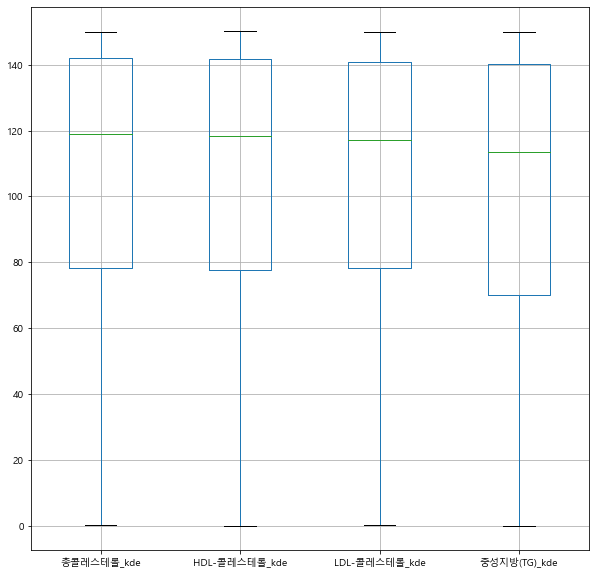

In [99]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

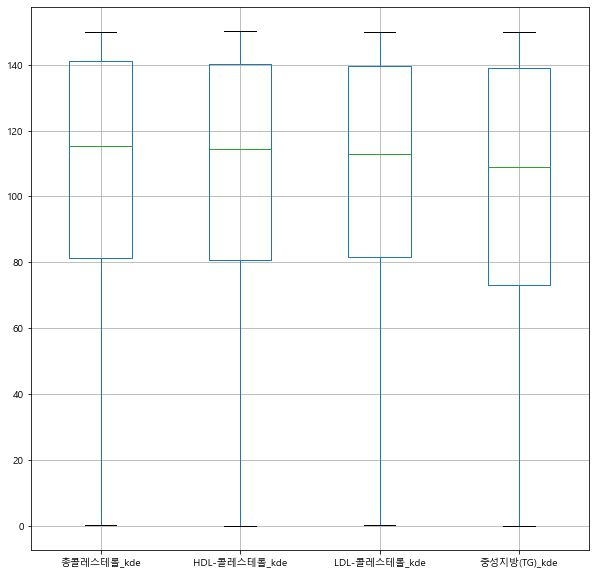

In [100]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [101]:
df_target['kde_mean'].max()

149.99

In [102]:
df_target['kde_mean'].min()

2.4

In [103]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [104]:
df_target['target'] = (df_target['target'] * 100) + 50

In [105]:
df_target['target'] = df_target['target'].round(0)

In [106]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,5
72,52.0,12
73,53.0,10
71,54.0,35
70,55.0,66
69,56.0,104
68,57.0,143
67,58.0,193
66,59.0,231
65,60.0,280


In [107]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
count,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.054882e+06,1.049937e+06,1.046300e+06,1.050484e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06,1.117251e+06
mean,2.021877e+03,5.090528e+05,1.491787e+06,1.381485e+00,4.061001e+01,1.973057e+02,5.833886e+01,1.198250e+02,1.070897e+02,1.060413e+02,1.055134e+02,1.053113e+02,1.019653e+02,1.047078e+02,1.023538e+02
std,1.698775e+00,3.653516e+05,7.931390e+05,4.857513e-01,8.962131e+00,3.382002e+01,1.368987e+01,3.182821e+01,5.272999e+01,3.957023e+01,3.946574e+01,3.895643e+01,4.091944e+01,2.429966e+01,1.215319e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,1.030000e+02,1.700000e+01,2.990000e+01,2.000000e+00,3.000000e-02,0.000000e+00,1.000000e-01,0.000000e+00,2.400000e+00,5.100000e+01
25%,2.021000e+03,2.212830e+05,6.809515e+05,1.000000e+00,3.400000e+01,1.740000e+02,4.800000e+01,9.700000e+01,6.600000e+01,8.125000e+01,8.082000e+01,8.151000e+01,7.312000e+01,8.987000e+01,9.500000e+01
50%,2.022000e+03,3.809730e+05,1.411482e+06,1.000000e+00,4.000000e+01,1.960000e+02,5.700000e+01,1.190000e+02,9.400000e+01,1.153600e+02,1.145500e+02,1.129100e+02,1.088400e+02,1.060900e+02,1.030000e+02
75%,2.023000e+03,8.362450e+05,2.173996e+06,2.000000e+00,4.800000e+01,2.200000e+02,6.700000e+01,1.410000e+02,1.370000e+02,1.410900e+02,1.403800e+02,1.397000e+02,1.390200e+02,1.233400e+02,1.120000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.950000e+02,9.700000e+01,2.095000e+02,2.680000e+02,1.500200e+02,1.501500e+02,1.500600e+02,1.500200e+02,1.499900e+02,1.250000e+02


<AxesSubplot:>

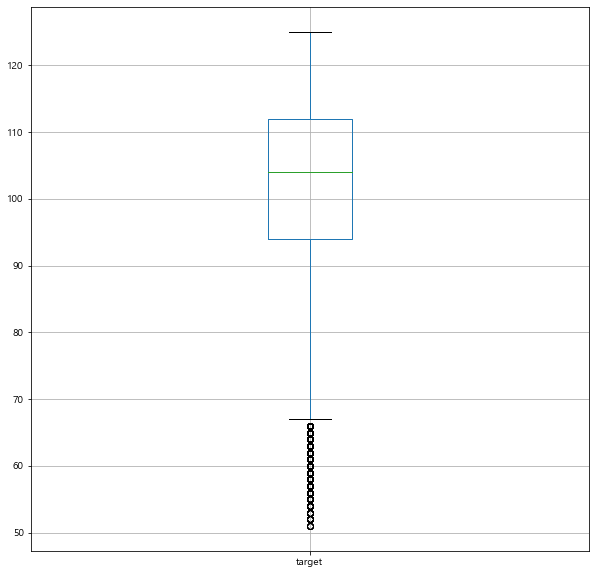

In [108]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

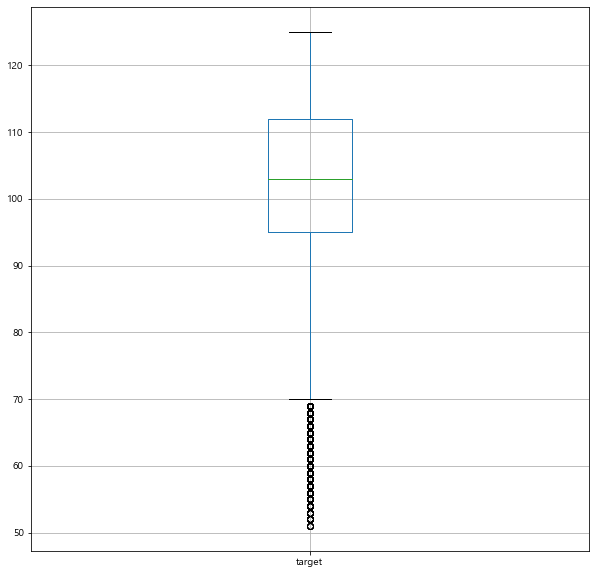

In [109]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

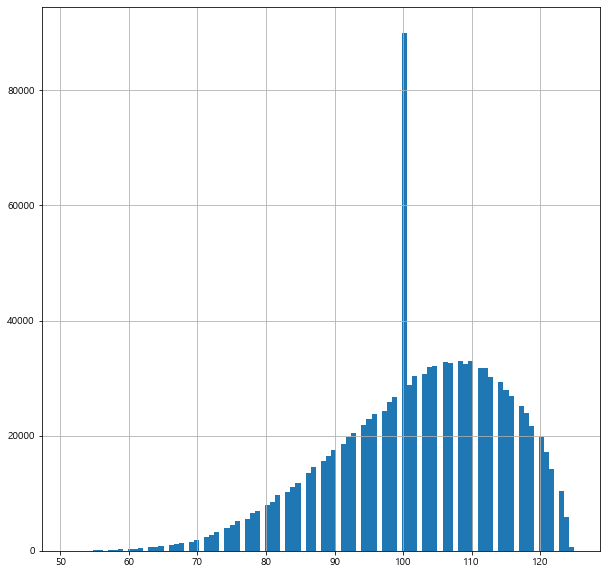

In [110]:
df_boxplot['target'].hist(bins=100)

In [111]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,83.13,92.0
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,82.28,91.0
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.76,118.0
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,114.34,107.0
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,130.25,115.0
731655,2010,710490,213,2,28,142.0,51.0,83.0,42.0,48.38,71.87,120.14,112.58,88.24,94.0
420321,2010,491012,226,1,45,188.0,34.0,121.0,167.0,138.76,33.75,149.62,97.98,105.03,103.0
694384,2010,315847,230,2,23,185.0,67.0,110.0,38.0,132.75,144.05,111.34,87.18,118.83,109.0
696674,2010,719072,231,2,24,166.0,64.0,93.0,43.0,147.50,148.01,149.39,117.10,140.50,120.0
239033,2010,614169,238,1,38,176.0,46.0,101.0,147.0,109.93,142.18,96.08,97.27,111.36,106.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

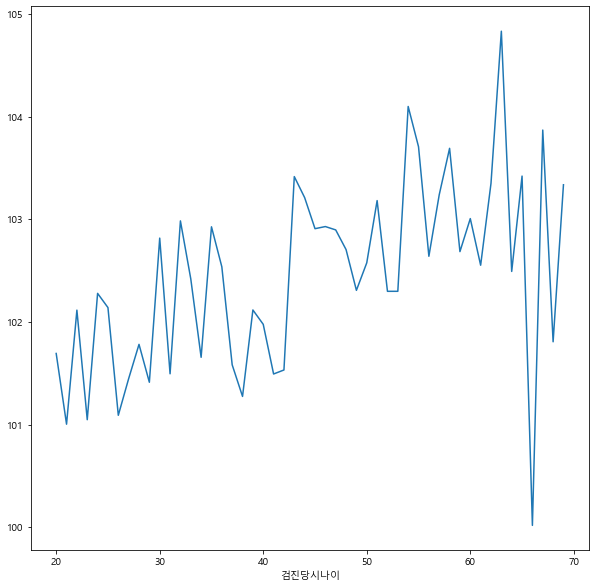

In [112]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

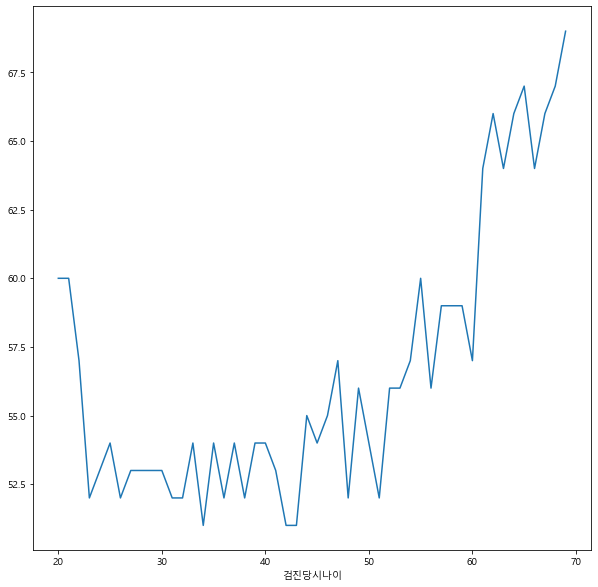

In [113]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

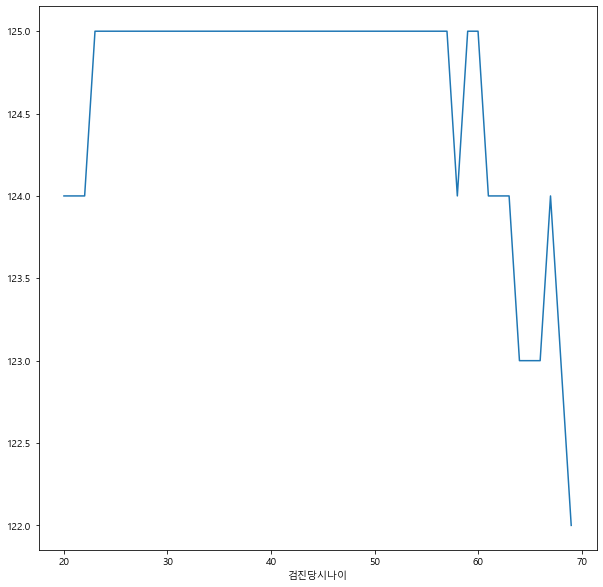

In [114]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [115]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,83.13,92.0
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,82.28,91.0
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.76,118.0
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,114.34,107.0
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,130.25,115.0


# 결측행 제거

In [116]:
# df_result.dropna(axis=0).info()

In [117]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [118]:
df_target['SEX'].value_counts()

1    691037
2    426214
Name: SEX, dtype: int64

In [119]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

691037

In [120]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,83.13,92.0
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,82.28,91.0
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.76,118.0
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,114.34,107.0
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,130.25,115.0


# 결측치 처리

## 결측치 삭제

In [121]:
# df_man.dropna(inplace=True)

In [122]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,83.13,92.0
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,82.28,91.0
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.76,118.0
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,114.34,107.0
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,130.25,115.0


## 결측치 평균으로 대체

In [123]:
# 결측치를 평균으로 대체 하는 함수
# fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [124]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [125]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [126]:
len(df_man)

691037

In [127]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [128]:
len(df_man)

655510

In [129]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
291764,2010,609272,143,1,40,265.0,46.0,189.0,129.0,32.62,143.66,30.05,126.18,83.13,92.0
572636,2010,585711,154,1,52,228.0,36.0,171.0,146.0,112.68,53.32,63.67,99.45,82.28,91.0
482883,2010,593983,156,1,48,191.0,41.0,138.0,105.0,137.24,109.15,146.79,149.88,135.76,118.0
267152,2010,612330,185,1,39,170.0,51.0,107.0,62.0,89.78,143.26,116.22,108.08,114.34,107.0
24796,2010,645901,212,1,28,194.0,51.0,133.0,51.0,146.82,150.00,114.23,109.96,130.25,115.0


## fillna

In [130]:
df_man.mean().round(2)

검진년도                2021.94
UID               513251.80
CU_REC_ID        1490531.83
SEX                    1.00
검진당시나이                42.02
총콜레스테롤               199.09
HDL-콜레스테롤             53.69
LDL-콜레스테롤            123.75
중성지방(TG)             122.10
총콜레스테롤_kde           106.10
HDL-콜레스테롤_kde        104.56
LDL-콜레스테롤_kde        106.16
중성지방(TG)_kde         104.10
kde_mean             105.23
target               102.61
dtype: float64

In [131]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [132]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [133]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [134]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [135]:
len(df_man)

655510

In [136]:
len(df_man)

655510

In [137]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [138]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
2343,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0
594666,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0
632869,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0
292290,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0
323504,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0
351948,2021,62,699357,1,42,248.0,50.0,169.0,144.0,63.37,147.44,65.45,114.41,97.67,99.0
380895,2022,62,1356310,1,43,247.0,55.0,173.0,91.0,71.83,129.48,64.62,148.94,103.72,102.0
409676,2023,62,2170394,1,44,237.0,61.4,154.0,108.0,85.33,92.67,99.67,149.88,106.89,103.0
550952,2019,67,410099,1,51,223.0,63.0,147.0,100.0,120.11,76.21,117.79,149.74,115.96,108.0
574688,2020,67,481109,1,52,266.0,63.0,176.0,147.0,31.22,80.40,52.27,98.11,65.50,83.0


In [139]:
len(df_man)

655510

In [140]:
df_man[target_cols]

,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
2343,148.0,58.0,75.00,74.0
594666,197.0,49.0,114.00,172.0
632869,232.0,54.0,135.00,217.0
292290,272.0,63.0,192.00,86.0
323504,265.0,58.0,173.00,168.0
...,...,...,...,...
689537,161.0,44.0,81.00,178.0
51616,259.0,63.0,171.00,125.0
283992,237.0,49.0,123.75,199.0
12005,208.0,50.0,142.00,82.0


## first만 남겨두고 중복 제거

In [141]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [142]:
len(df_man)

552874

In [143]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
2343,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0
594666,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0
632869,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0
292290,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0
323504,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0
351948,2021,62,699357,1,42,248.0,50.0,169.0,144.0,63.37,147.44,65.45,114.41,97.67,99.0
380895,2022,62,1356310,1,43,247.0,55.0,173.0,91.0,71.83,129.48,64.62,148.94,103.72,102.0
409676,2023,62,2170394,1,44,237.0,61.4,154.0,108.0,85.33,92.67,99.67,149.88,106.89,103.0
550952,2019,67,410099,1,51,223.0,63.0,147.0,100.0,120.11,76.21,117.79,149.74,115.96,108.0
574688,2020,67,481109,1,52,266.0,63.0,176.0,147.0,31.22,80.40,52.27,98.11,65.50,83.0


In [144]:
df_man.reset_index(drop=True, inplace=True)

In [145]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
0,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0
1,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0
2,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0
3,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0
4,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0


In [146]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552874 entries, 0 to 552873
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           552874 non-null  int64  
 1   UID            552874 non-null  int64  
 2   CU_REC_ID      552874 non-null  int64  
 3   SEX            552874 non-null  int64  
 4   검진당시나이         552874 non-null  int64  
 5   총콜레스테롤         552874 non-null  float64
 6   HDL-콜레스테롤      552874 non-null  float64
 7   LDL-콜레스테롤      552874 non-null  float64
 8   중성지방(TG)       552874 non-null  float64
 9   총콜레스테롤_kde     552874 non-null  float64
 10  HDL-콜레스테롤_kde  552874 non-null  float64
 11  LDL-콜레스테롤_kde  552874 non-null  float64
 12  중성지방(TG)_kde   552874 non-null  float64
 13  kde_mean       552874 non-null  float64
 14  target         552874 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 63.3 MB


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

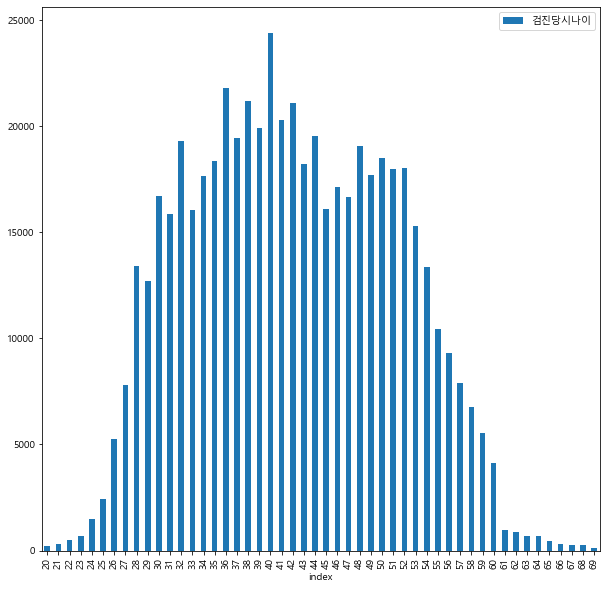

In [147]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [148]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,204
45,21,307
42,22,511
41,23,687
36,24,1464
35,25,2427
33,26,5239
30,27,7797
24,28,13402
26,29,12713


# 검진항목 시각화

In [149]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
count,552874.000000,5.528740e+05,5.528740e+05,552874.0,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000,552874.000000
mean,2021.882460,5.085337e+05,1.486090e+06,1.0,41.994208,199.173248,53.612870,123.780260,122.164919,106.116283,104.626933,106.211850,103.964368,105.229839,102.614326
std,1.760241,3.630189e+05,8.130943e+05,0.0,8.936842,34.933240,11.817673,32.538662,54.079243,40.254077,41.604449,39.528388,39.945529,24.238147,12.122559
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,103.000000,17.000000,29.900000,4.000000,0.390000,0.000000,0.110000,0.440000,5.720000,53.000000
25%,2021.000000,2.223650e+05,6.522852e+05,1.0,35.000000,175.000000,45.000000,102.000000,80.000000,78.130000,76.210000,79.820000,73.270000,89.030000,95.000000
50%,2022.000000,3.814600e+05,1.394272e+06,1.0,42.000000,199.000000,52.000000,123.750000,113.000000,118.080000,117.270000,116.900000,114.410000,107.980000,104.000000
75%,2023.000000,8.359300e+05,2.190967e+06,1.0,49.000000,223.000000,61.000000,146.000000,156.000000,141.450000,141.270000,140.730000,140.090000,123.970000,112.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,295.000000,97.000000,209.500000,268.000000,150.020000,150.130000,150.030000,150.020000,149.920000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

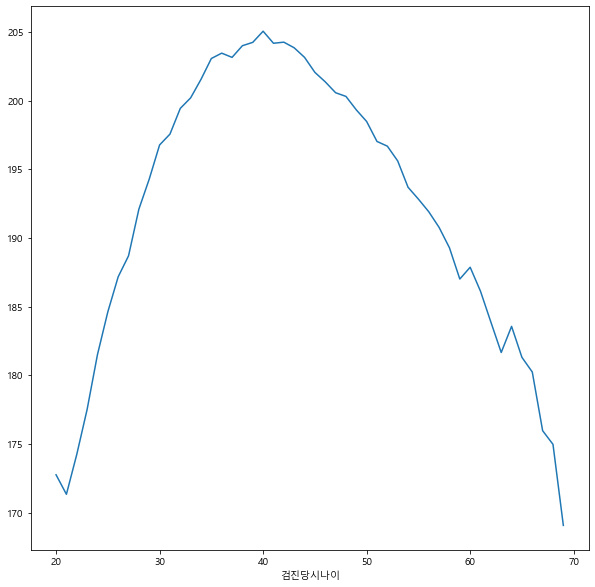

In [150]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

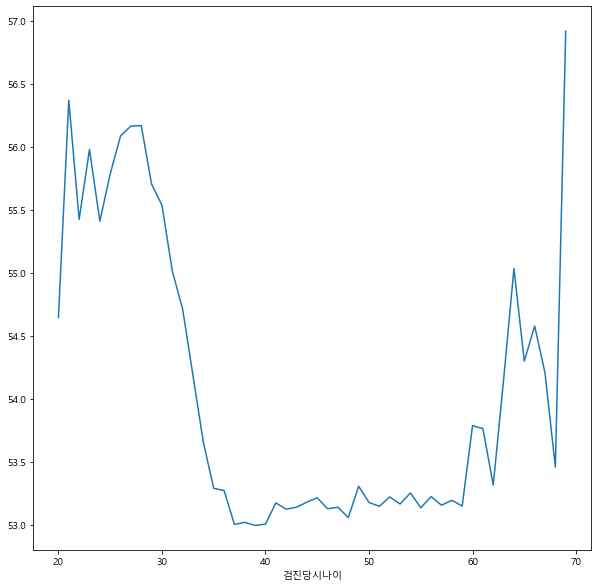

In [151]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [152]:
# df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

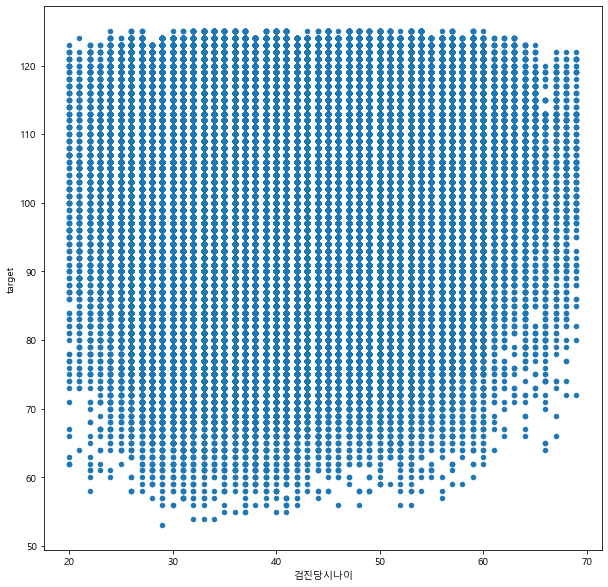

In [153]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

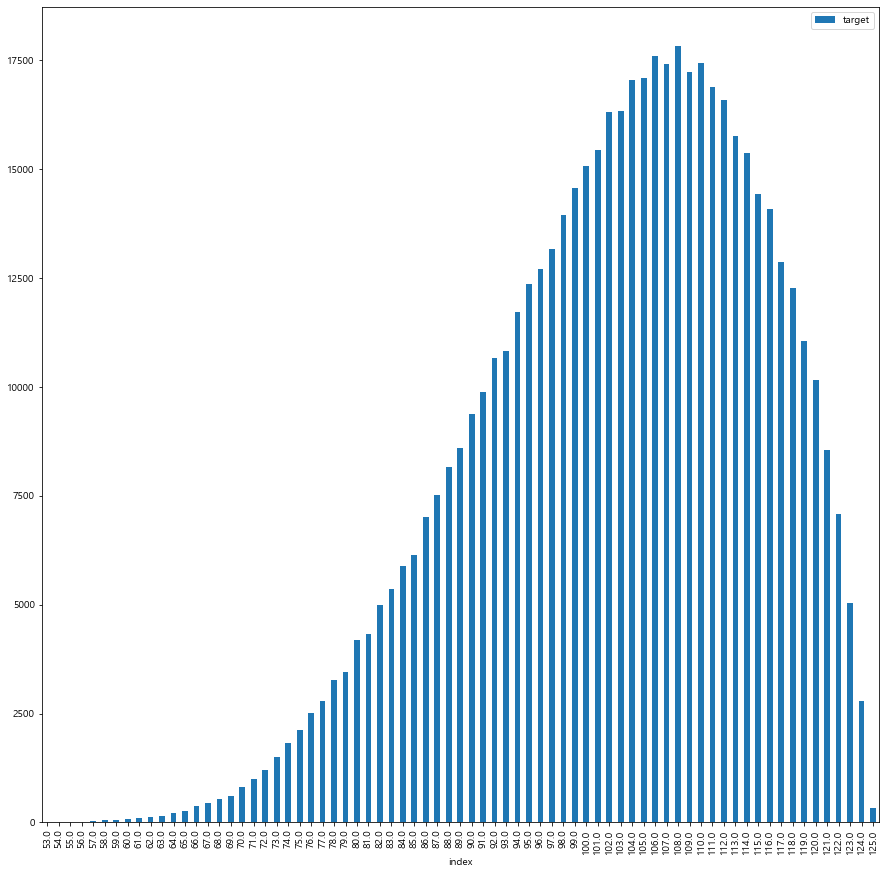

In [154]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [155]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
72,53.0,1
71,54.0,3
70,55.0,6
69,56.0,18
68,57.0,24
67,58.0,49
66,59.0,52
65,60.0,72
64,61.0,92
63,62.0,129


In [156]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [157]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

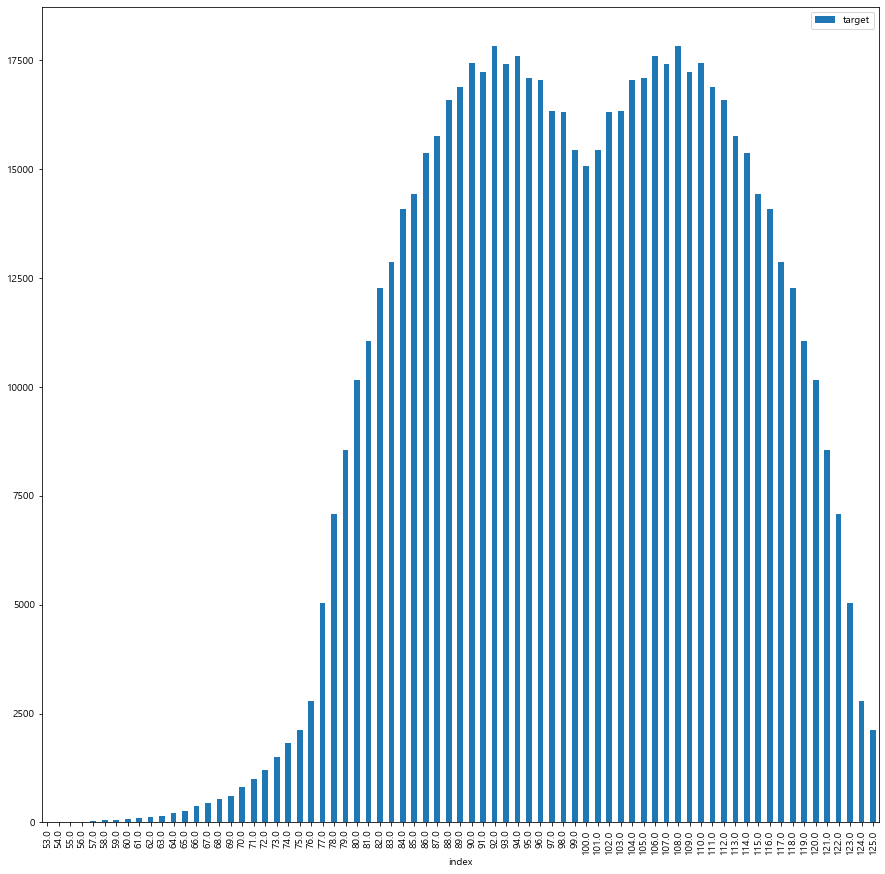

In [158]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [159]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
72,53.0,1
71,54.0,3
70,55.0,6
69,56.0,18
68,57.0,24
67,58.0,49
66,59.0,52
65,60.0,72
64,61.0,92
63,62.0,129


# 나이별 확인하기

In [160]:
# target = 'target'

In [161]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [162]:
# df_man = df_man_sample

In [163]:
# int(df_man['검진당시나이'].value_counts().mean())

In [164]:
# df_man['검진당시나이'].min()

In [165]:
# df_man['검진당시나이'].max()

In [166]:
# df_man.columns

In [167]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [168]:
# df_temp.info()

In [169]:
# df_temp.reset_index(drop=True, inplace=True)

In [170]:
# df_man = df_temp.copy()

In [171]:
# df_man['검진당시나이'].value_counts()

In [172]:
# df_man[df_man['검진당시나이']==38]

In [173]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [174]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)', '총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde',
       '중성지방(TG)_kde', 'kde_mean', 'target'],
      dtype='object')

In [175]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [176]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [177]:
train_columns = target_cols.copy()

In [178]:
train_columns.insert(0, '검진당시나이')

In [179]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [180]:
train_columns

['검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [181]:
target_col = 'target'

## Min Max Scaling

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaling_bool

False

In [184]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [185]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [186]:
# model = LinearRegression()

In [187]:
# model.fit(X_train, y_train)

In [188]:
# model.intercept_

In [189]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [190]:
model = XGBRegressor()

In [191]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [192]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [193]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2515.02 seconds for 10 candidates parameter settings.


In [194]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [195]:
# best score
random_search.best_score_

-0.49614594424258984

In [196]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [197]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [198]:
# model = build_model()

In [199]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [200]:
# model.summary()

In [201]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [202]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [203]:
# plot_history(history)

## pyTorch 신경망

In [204]:
np.shape(X_train)[1]

5

In [205]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [206]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [207]:
# epochs = 1000

In [208]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [209]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [210]:
# plt.plot(losses)

## coef 계산

In [211]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [212]:
# df_coef.columns = ['검사항목', 'coef']

In [213]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [214]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [215]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [216]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [217]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [218]:
# slr = LinearRegression()

In [219]:
# slr.fit(X_train_poly, y_train)

In [220]:
# np.shape(X_train)

In [221]:
# np.shape(X_train_poly)

In [222]:
# np.shape(X_test)

In [223]:
# np.shape(X_test_poly)

In [224]:
# y_pred_poly = slr.predict(X_test_poly)

In [225]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [226]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [227]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [228]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [229]:
pyTorch_bool

False

In [230]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [231]:
XGB_bool

True

In [232]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [233]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.5407660346409827
MSE : 0.49328898198264876
RMSE : 0.7023453438178748


In [234]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.996957192832335

In [235]:
model.score(X_test, y_test)

0.996957192832335

## feature importance

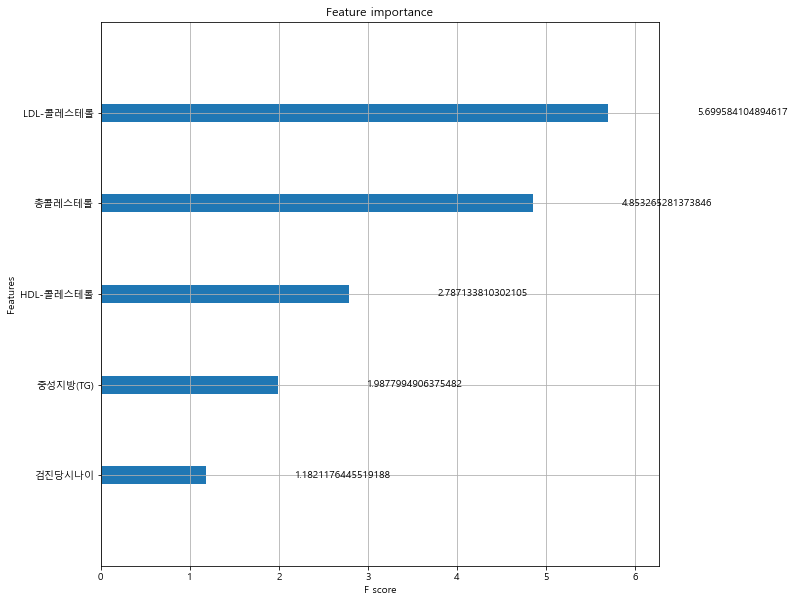

In [236]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [237]:
model.feature_importances_

array([0.07160053, 0.2939609 , 0.1688159 , 0.34522218, 0.12040045],
      dtype=float32)

In [238]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [239]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
3,LDL-콜레스테롤,0.345222
1,총콜레스테롤,0.293961
2,HDL-콜레스테롤,0.168816
4,중성지방(TG),0.120400
0,검진당시나이,0.071601


# 실제지수 - 예측지수 결과

In [240]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,81.0
1,101.0
2,102.0
3,90.0
4,110.0
...,...
173470,95.0
173471,105.0
173472,99.0
173473,105.0


In [241]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,81.357758
1,102.202339
2,100.938751
3,92.256111
4,110.276573
...,...
173470,96.005905
173471,104.282669
173472,97.774704
173473,105.553993


In [242]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [243]:
df_test.head()

,target,0
0,81.0,81.357758
1,101.0,102.202339
2,102.0,100.938751
3,90.0,92.256111
4,110.0,110.276573


In [244]:
df_test.columns

Index(['target', 0], dtype='object')

In [245]:
df_test.columns = ['실제지수', '예측지수']

In [246]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [247]:
df_test.head()

,실제지수,예측지수,diff
0,81.0,81.357758,0.357758
1,101.0,102.202339,1.202339
2,102.0,100.938751,-1.061249
3,90.0,92.256111,2.256111
4,110.0,110.276573,0.276573


In [248]:
df_test['diff_int'] = df_test['diff'].round(0)

In [249]:
len(df_test)

173475

In [250]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,81.0,81.357758,0.357758,0.0
1,101.0,102.202339,1.202339,1.0
2,102.0,100.938751,-1.061249,-1.0
3,90.0,92.256111,2.256111,2.0
4,110.0,110.276573,0.276573,0.0


<AxesSubplot:>

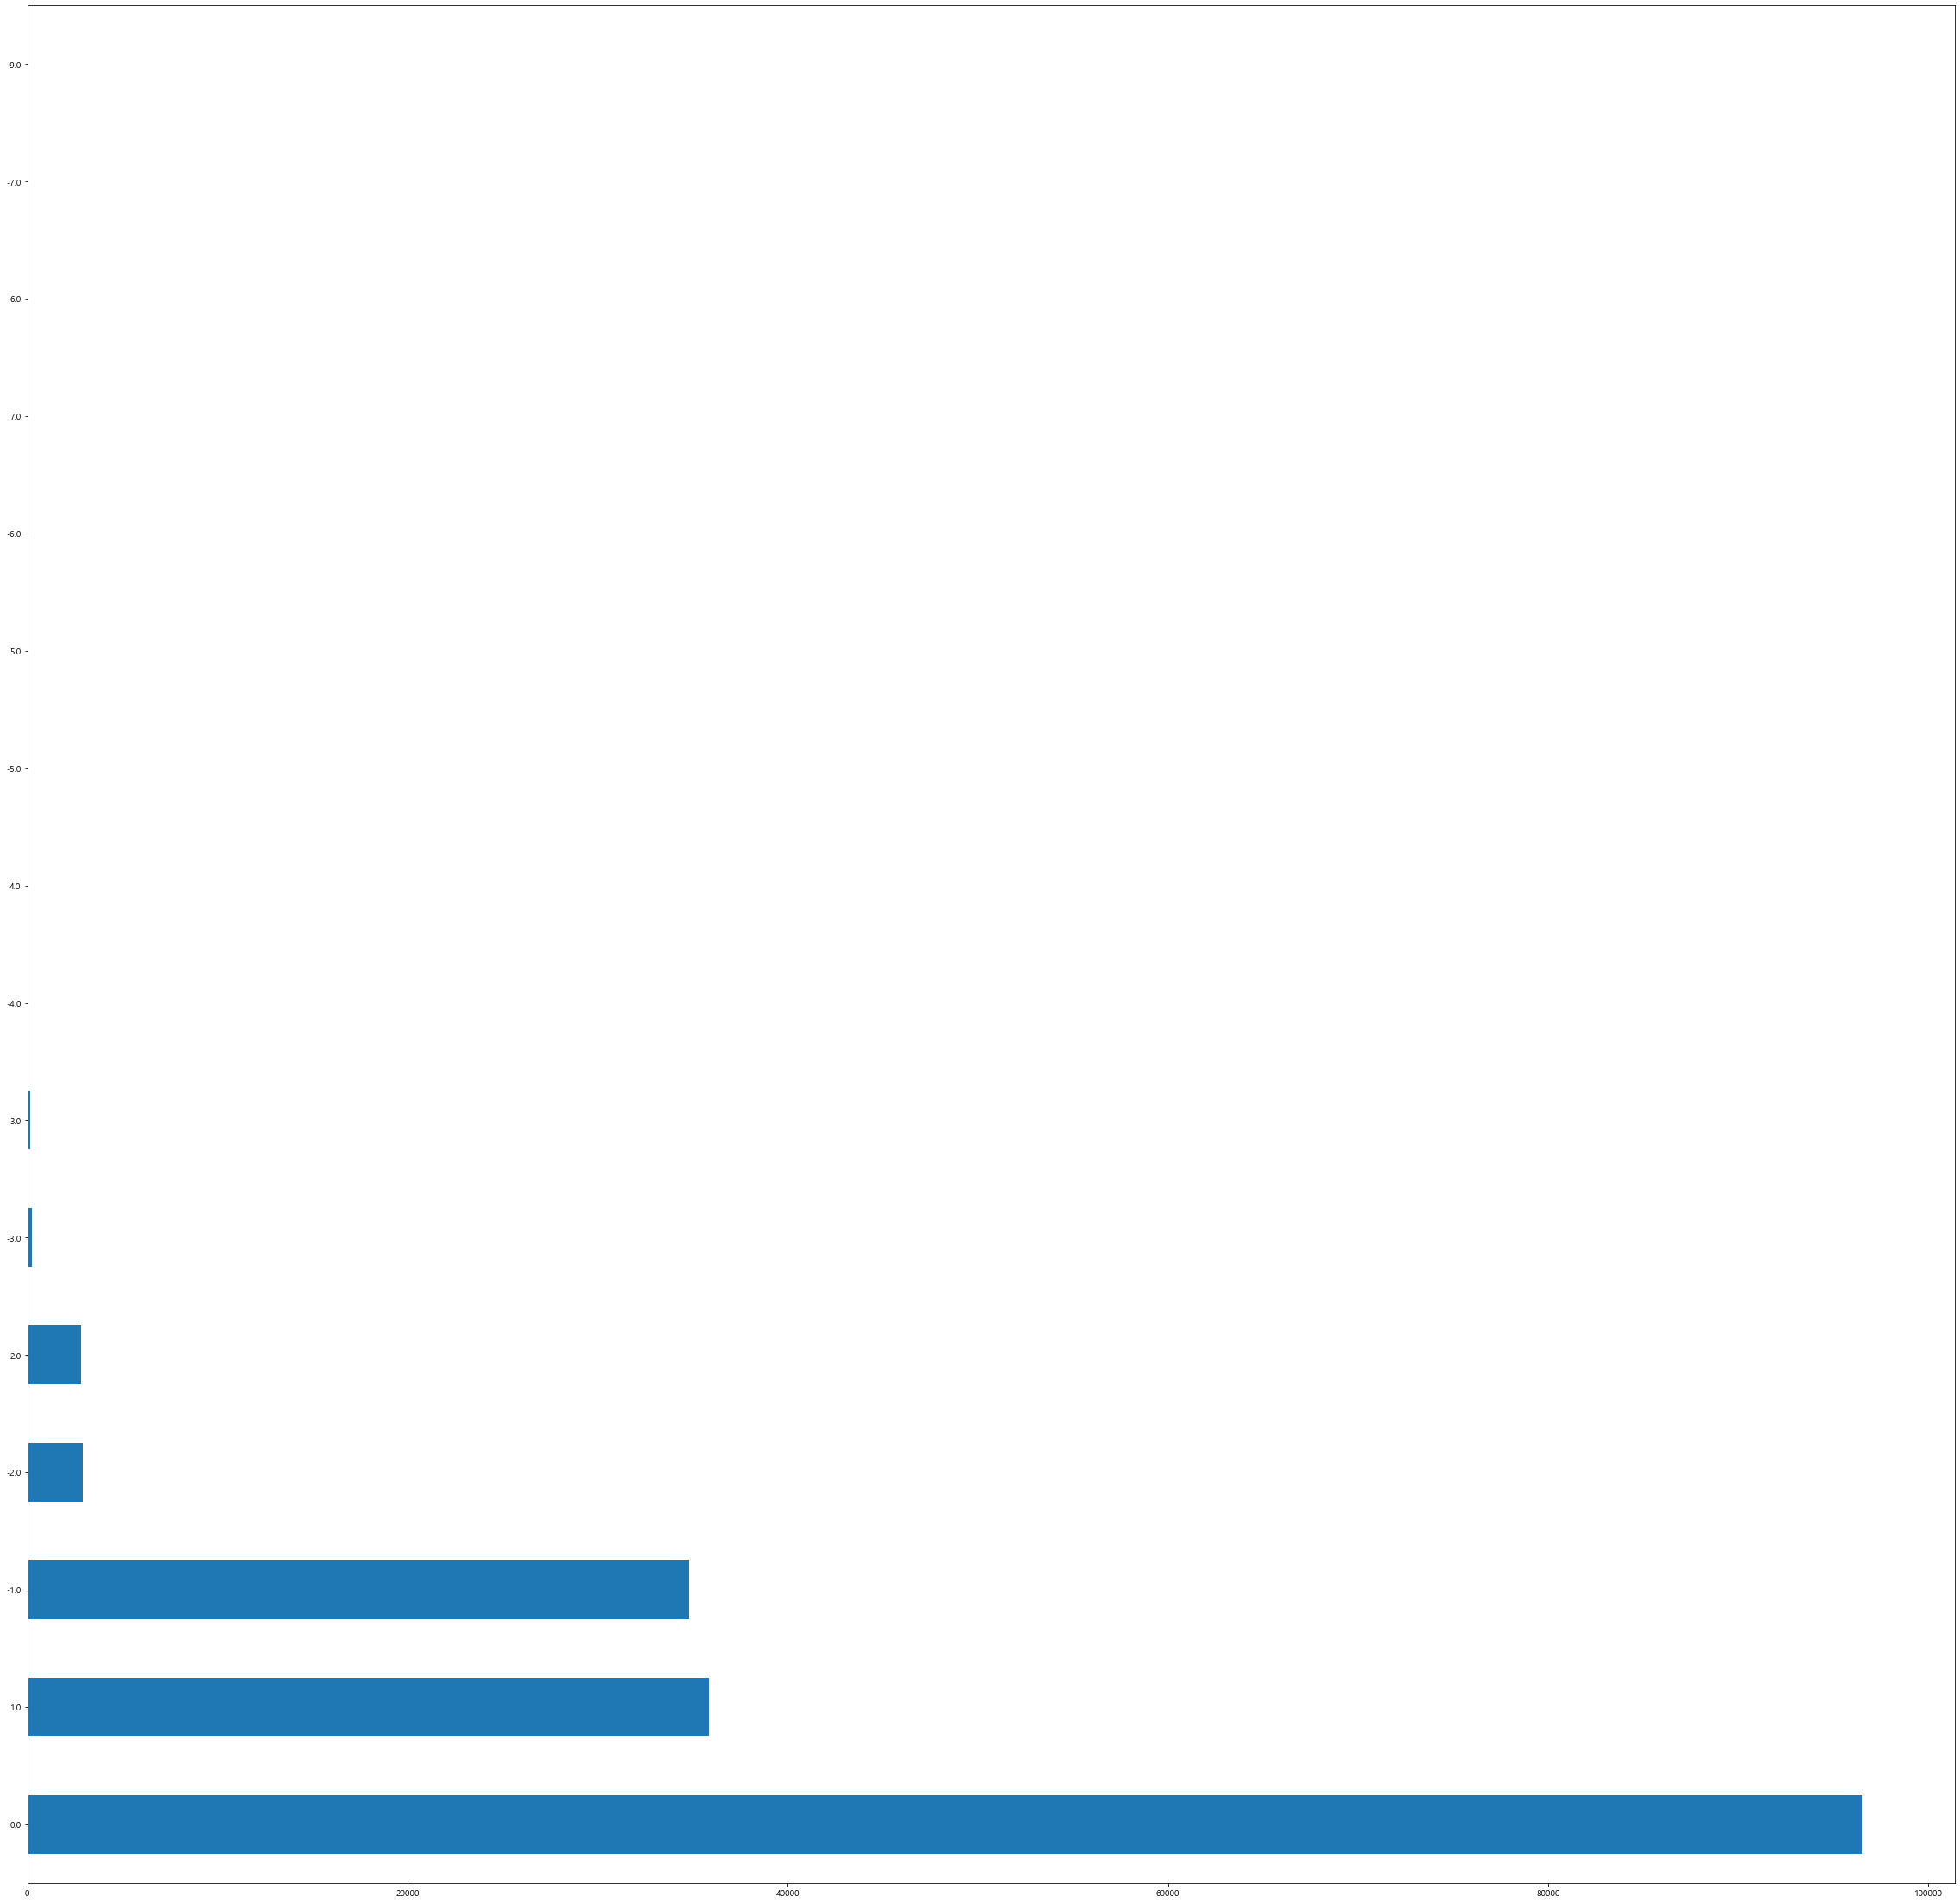

In [251]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [252]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    96562
 1.0    35840
-1.0    34821
-2.0     2916
 2.0     2811
-3.0      252
 3.0      168
-4.0       34
 4.0       28
-5.0       16
 5.0       13
-6.0        6
 7.0        3
 6.0        3
-7.0        1
-9.0        1
Name: diff_int, dtype: int64

In [253]:
df_test['예측지수'].round(0).value_counts()

108.0    4483
92.0     4453
110.0    4440
107.0    4438
95.0     4421
93.0     4398
91.0     4358
105.0    4351
109.0    4314
90.0     4302
106.0    4282
111.0    4266
112.0    4260
94.0     4234
89.0     4228
88.0     4207
97.0     4200
104.0    4165
103.0    4155
96.0     4099
98.0     4048
101.0    3982
102.0    3960
113.0    3945
87.0     3928
86.0     3883
99.0     3868
114.0    3777
100.0    3753
115.0    3615
85.0     3505
116.0    3439
84.0     3435
83.0     3294
117.0    3249
82.0     3075
118.0    2906
119.0    2849
81.0     2836
80.0     2506
120.0    2394
79.0     2107
121.0    2078
122.0    1772
78.0     1744
123.0    1395
77.0     1232
124.0     829
76.0      735
75.0      572
74.0      453
125.0     411
73.0      388
72.0      286
71.0      233
70.0      175
69.0      148
68.0      144
67.0      104
66.0       91
65.0       64
64.0       56
63.0       47
62.0       35
60.0       20
61.0       20
56.0       10
58.0        9
59.0        8
57.0        5
55.0        3
Name: 

# 예측 나이 분포

In [254]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [255]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [256]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [257]:
df_plot = pd.DataFrame(y_test.value_counts())

In [258]:
df_plot.columns = ['count']

In [259]:
df_plot.reset_index(inplace=True)

In [260]:
df_plot = df_plot.sort_values('index', ascending=True)

In [261]:
df_plot

,index,count
70,55.0,1
68,56.0,7
67,57.0,9
69,58.0,6
66,59.0,13
64,60.0,22
65,61.0,21
63,62.0,32
62,63.0,38
61,64.0,52


In [262]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

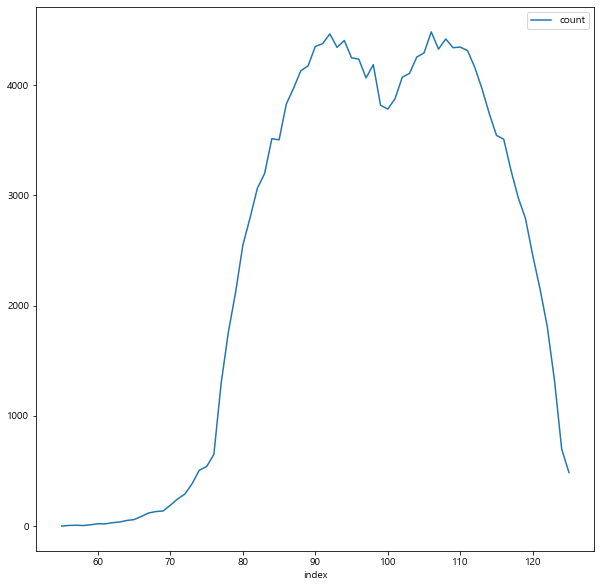

In [263]:
df_plot.plot()

In [264]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [265]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [266]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [267]:
df_plot.columns = ['count']

In [268]:
df_plot.reset_index(inplace=True)

In [269]:
df_plot = df_plot.sort_values(0, ascending=True)

In [270]:
df_plot.set_index(0, inplace=True)

In [271]:
df_plot

,count
0,
55.0,3
56.0,10
57.0,5
58.0,9
59.0,8
60.0,20
61.0,20
62.0,35
63.0,47


<AxesSubplot:xlabel='0'>

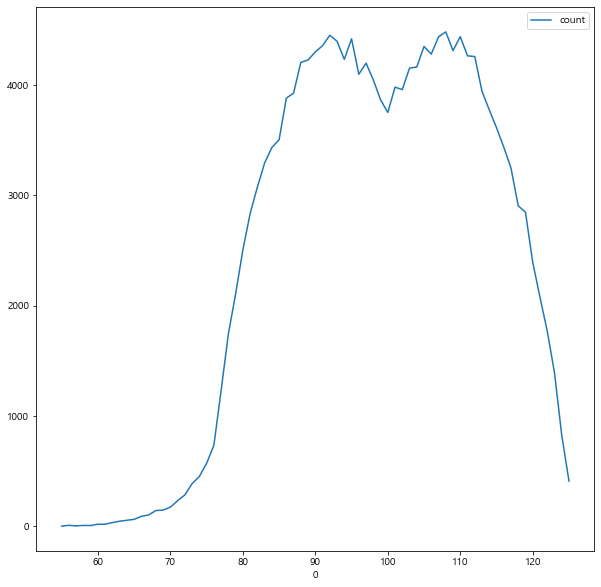

In [272]:
df_plot.plot()

# 시각화

In [273]:
# model.coef_

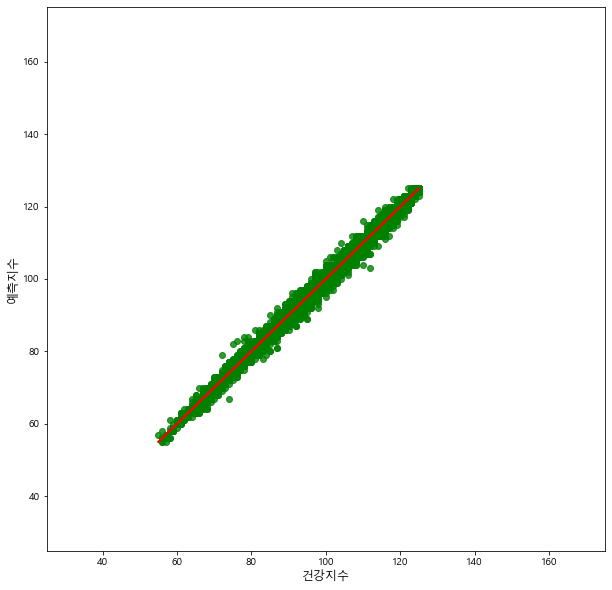

In [274]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [275]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
0,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0
1,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0
2,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0
3,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0
4,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0


In [276]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552874 entries, 0 to 552873
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           552874 non-null  int64  
 1   UID            552874 non-null  int64  
 2   CU_REC_ID      552874 non-null  int64  
 3   SEX            552874 non-null  int64  
 4   검진당시나이         552874 non-null  int64  
 5   총콜레스테롤         552874 non-null  float64
 6   HDL-콜레스테롤      552874 non-null  float64
 7   LDL-콜레스테롤      552874 non-null  float64
 8   중성지방(TG)       552874 non-null  float64
 9   총콜레스테롤_kde     552874 non-null  float64
 10  HDL-콜레스테롤_kde  552874 non-null  float64
 11  LDL-콜레스테롤_kde  552874 non-null  float64
 12  중성지방(TG)_kde   552874 non-null  float64
 13  kde_mean       552874 non-null  float64
 14  target         552874 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 63.3 MB


In [277]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
85716,2022,168996,2259500,1,35,215.0,64.0,124.0,137.0,131.87,77.36,149.95,100.85,115.01,108.0
85717,2023,168996,2259499,1,36,210.0,67.0,128.0,76.0,140.83,62.13,149.10,143.33,123.85,112.0
85718,2024,168996,2281994,1,37,238.0,76.0,153.0,45.0,77.86,23.00,109.35,56.30,66.63,83.0


In [278]:
train_columns

['검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [279]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [280]:
len(df_pred)

552874

In [281]:
df_pred.reset_index(drop=True, inplace=True)

In [282]:
X_test

,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
528531,60,140.0,34.0,69.00,183.0
367788,54,241.0,55.0,169.00,83.0
140581,52,226.0,93.0,112.00,101.0
524518,34,236.0,39.0,173.00,121.0
23757,59,173.0,63.0,95.00,75.0
...,...,...,...,...,...
362392,51,235.0,61.0,123.75,186.0
496073,30,214.0,70.0,126.00,90.0
293933,32,224.0,77.0,129.00,59.0
53120,45,217.0,66.0,143.00,66.0


In [283]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)', '총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde',
       '중성지방(TG)_kde', 'kde_mean', 'target'],
      dtype='object')

In [284]:
df_pred[train_columns]

,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,24,148.0,58.0,75.00,74.0
1,53,197.0,49.0,114.00,172.0
2,55,232.0,54.0,135.00,217.0
3,40,272.0,63.0,192.00,86.0
4,41,265.0,58.0,173.00,168.0
...,...,...,...,...,...
552869,65,161.0,44.0,81.00,178.0
552870,29,259.0,63.0,171.00,125.0
552871,39,237.0,49.0,123.75,199.0
552872,26,208.0,50.0,142.00,82.0


In [285]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [286]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [287]:
pred_data = pred_data.round(0)

In [288]:
pred_data

array([105., 114., 102., ...,  98., 106., 117.], dtype=float32)

In [289]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [290]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [291]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0,105.0
1,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0,114.0
2,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0,102.0
3,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0,84.0
4,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0,84.0
5,2021,62,699357,1,42,248.0,50.0,169.0,144.0,63.37,147.44,65.45,114.41,97.67,99.0,99.0
6,2022,62,1356310,1,43,247.0,55.0,173.0,91.0,71.83,129.48,64.62,148.94,103.72,102.0,103.0
7,2023,62,2170394,1,44,237.0,61.4,154.0,108.0,85.33,92.67,99.67,149.88,106.89,103.0,103.0
8,2019,67,410099,1,51,223.0,63.0,147.0,100.0,120.11,76.21,117.79,149.74,115.96,108.0,108.0
9,2020,67,481109,1,52,266.0,63.0,176.0,147.0,31.22,80.40,52.27,98.11,65.50,83.0,84.0


## 예측지수 성능평가

In [292]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.4849821116565438

# target으로 나이 계산

In [293]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [294]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,148.0,58.0,75.00,74.0,87.19,127.81,86.42,144.68,111.52,106.0,105.0,23.0
1,2019,50,356493,1,53,197.0,49.0,114.00,172.0,149.92,146.56,132.72,80.56,127.44,114.0,114.0,50.2
2,2021,50,642497,1,55,232.0,54.0,135.00,217.0,106.63,122.70,137.95,39.55,101.71,101.0,102.0,54.6
3,2019,62,421626,1,40,272.0,63.0,192.00,86.0,26.06,78.91,25.43,141.64,68.01,84.0,84.0,43.2
4,2020,62,565527,1,41,265.0,58.0,173.00,168.0,29.12,96.14,51.30,79.39,63.99,82.0,84.0,44.2
5,2021,62,699357,1,42,248.0,50.0,169.00,144.0,63.37,147.44,65.45,114.41,97.67,99.0,99.0,42.2
6,2022,62,1356310,1,43,247.0,55.0,173.00,91.0,71.83,129.48,64.62,148.94,103.72,102.0,103.0,42.4
7,2023,62,2170394,1,44,237.0,61.4,154.00,108.0,85.33,92.67,99.67,149.88,106.89,103.0,103.0,43.4
8,2019,67,410099,1,51,223.0,63.0,147.00,100.0,120.11,76.21,117.79,149.74,115.96,108.0,108.0,49.4
9,2020,67,481109,1,52,266.0,63.0,176.00,147.0,31.22,80.40,52.27,98.11,65.50,83.0,84.0,55.2


## 예측나이 성능평가

In [295]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.064776784583829

# 최종 산출

In [296]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,148.0,58.0,75.0,74.0,87.19,127.81,86.42,144.68,111.52,106.0,105.0,23.0
1,2019,50,356493,1,53,197.0,49.0,114.0,172.0,149.92,146.56,132.72,80.56,127.44,114.0,114.0,50.2
2,2021,50,642497,1,55,232.0,54.0,135.0,217.0,106.63,122.70,137.95,39.55,101.71,101.0,102.0,54.6
3,2019,62,421626,1,40,272.0,63.0,192.0,86.0,26.06,78.91,25.43,141.64,68.01,84.0,84.0,43.2
4,2020,62,565527,1,41,265.0,58.0,173.0,168.0,29.12,96.14,51.30,79.39,63.99,82.0,84.0,44.2


# DataMart csv

In [297]:
df_copy = df.copy()

In [298]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0
2,2010,7915,3997,1,36,196.0,37.0,50.0,547.0
3,2010,8056,4745,1,42,310.0,53.0,181.4,378.0
4,2010,8457,3929,1,38,189.0,50.0,108.0,154.0


In [299]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   총콜레스테롤     1151191 non-null  float64
 6   HDL-콜레스테롤  1146478 non-null  float64
 7   LDL-콜레스테롤  1141538 non-null  float64
 8   중성지방(TG)   1147041 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [300]:
minimums

[103.0, 17.0, 29.5, -52.0]

In [301]:
maximums

[295.0, 97.0, 209.5, 268.0]

In [302]:
train_columns

['검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [303]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [304]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [305]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [306]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0
2,2010,7915,3997,1,36,196.0,37.0,50.0,268.0
3,2010,8056,4745,1,42,295.0,53.0,181.4,268.0
4,2010,8457,3929,1,38,189.0,50.0,108.0,154.0


## 검진 항목 all 결측치 지우기

In [307]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [308]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [309]:
df_man_csv.reset_index(drop=True, inplace=True)

In [310]:
len(df_man_csv)

729932

## fillna

In [311]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 모델 예측

In [312]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [313]:
pred_data = pred_data.round(0)

In [314]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [315]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0,104.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0,90.0
2,2010,7915,3997,1,36,196.0,37.0,50.0,268.0,77.0
3,2010,8056,4745,1,42,295.0,53.0,181.4,268.0,75.0
4,2010,8457,3929,1,38,189.0,50.0,108.0,154.0,111.0


### 성능 평가

In [316]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [317]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [318]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [319]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 2.1711688212052636


In [320]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9111116073612754

In [321]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0,104.0,41.2
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0,90.0,41.0
2,2010,7915,3997,1,36,196.0,37.0,50.0,268.0,77.0,40.6
3,2010,8056,4745,1,42,295.0,53.0,181.4,268.0,75.0,47.0
4,2010,8457,3929,1,38,189.0,50.0,108.0,154.0,111.0,35.8


In [322]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729932 entries, 0 to 729931
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       729932 non-null  int64  
 1   UID        729932 non-null  int64  
 2   CU_REC_ID  729932 non-null  int64  
 3   SEX        729932 non-null  int64  
 4   검진당시나이     729932 non-null  int64  
 5   총콜레스테롤     729932 non-null  float64
 6   HDL-콜레스테롤  729932 non-null  float64
 7   LDL-콜레스테롤  729932 non-null  float64
 8   중성지방(TG)   729932 non-null  float64
 9   예측지수       729932 non-null  float32
 10  예측나이       729932 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 58.5 MB


# 최종 UID별 확인

In [323]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
267207,2022,175673,751348,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267208,2022,175673,1463838,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267144,2022,175673,1919125,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267209,2022,175673,2169120,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267145,2022,175673,2223795,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267146,2022,175673,2237465,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267210,2022,175673,2238320,1,48,193.0,55.0,111.0,133.0,116.0,44.8
267211,2022,175673,2246042,1,48,193.0,55.0,111.0,133.0,116.0,44.8
431220,2023,175673,1463893,1,49,206.0,61.0,136.0,44.0,104.0,48.2
431216,2023,175673,1919126,1,49,206.0,61.0,136.0,44.0,104.0,48.2


In [324]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
192288,2021,289587,796178,1,47,173.0,59.0,73.0,203.0,93.0,48.4
299141,2022,289587,866076,1,48,185.0,57.0,70.0,268.0,89.0,50.2
299097,2022,289587,2115999,1,48,185.0,57.0,70.0,268.0,89.0,50.2
98640,2022,289587,2603574,1,48,185.0,57.0,70.0,268.0,89.0,50.2
481287,2023,289587,1487447,1,49,180.0,46.0,82.0,259.0,95.0,50.0
481288,2023,289587,2227964,1,49,180.0,46.0,82.0,259.0,95.0,50.0
665814,2024,289587,2243723,1,50,209.0,55.0,108.0,231.0,103.0,49.4
665792,2024,289587,2603575,1,50,209.0,55.0,108.0,231.0,103.0,49.4


In [325]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
400834,2022,897603,1066133,1,51,182.0,58.0,103.0,105.0,116.0,47.8
400845,2022,897603,1068885,1,51,182.0,58.0,103.0,105.0,116.0,47.8
400847,2022,897603,1728532,1,51,182.0,58.0,103.0,105.0,116.0,47.8
400848,2022,897603,2555144,1,51,182.0,58.0,103.0,105.0,116.0,47.8
573679,2023,897603,1458387,1,52,184.0,52.0,109.0,114.0,118.0,48.4
573680,2023,897603,1728531,1,52,184.0,52.0,109.0,114.0,118.0,48.4
562300,2023,897603,2120063,1,52,184.0,52.0,109.0,114.0,118.0,48.4
562301,2023,897603,2351665,1,52,184.0,52.0,109.0,114.0,118.0,48.4
573681,2023,897603,2555143,1,52,184.0,52.0,109.0,114.0,118.0,48.4
562302,2023,897603,2622260,1,52,184.0,52.0,109.0,114.0,118.0,48.4


In [326]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
251304,2022,119172,751336,1,41,187.0,52.0,121.0,72.0,120.0,37.0
251305,2022,119172,1432355,1,41,187.0,52.0,121.0,72.0,120.0,37.0
251302,2022,119172,1432476,1,41,187.0,52.0,121.0,72.0,120.0,37.0
251306,2022,119172,2247083,1,41,187.0,52.0,121.0,72.0,120.0,37.0
251307,2022,119172,2252956,1,41,187.0,52.0,121.0,72.0,120.0,37.0
417025,2023,119172,1436742,1,42,189.0,60.0,110.0,93.0,112.0,39.6
417026,2023,119172,2247082,1,42,189.0,60.0,110.0,93.0,112.0,39.6
417027,2023,119172,2252955,1,42,189.0,60.0,110.0,93.0,112.0,39.6
647394,2024,119172,2250063,1,43,190.0,63.0,111.0,79.0,112.0,40.6
647395,2024,119172,2252954,1,43,190.0,63.0,111.0,79.0,112.0,40.6


In [327]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
573674,2023,897595,1525045,1,40,186.0,47.0,124.0,73.0,119.0,36.2
573675,2023,897595,1593851,1,40,186.0,47.0,124.0,73.0,119.0,36.2
573672,2023,897595,2005289,1,40,186.0,47.0,124.0,73.0,119.0,36.2
573673,2023,897595,2138998,1,40,186.0,47.0,124.0,73.0,119.0,36.2
557883,2023,897595,2320478,1,40,186.0,47.0,124.0,73.0,119.0,36.2
573676,2023,897595,2328772,1,40,186.0,47.0,124.0,73.0,119.0,36.2
707793,2024,897595,2329051,1,41,211.0,52.0,142.0,86.0,117.0,37.6


In [328]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
348776,2022,492764,909688,1,39,144.0,60.0,63.0,104.0,86.0,41.8
348777,2022,492764,1575802,1,39,144.0,60.0,63.0,104.0,86.0,41.8
348780,2022,492764,1668547,1,39,144.0,60.0,63.0,104.0,86.0,41.8
348778,2022,492764,2246777,1,39,144.0,60.0,63.0,104.0,86.0,41.8
348779,2022,492764,2330256,1,39,144.0,60.0,63.0,104.0,86.0,41.8
144729,2022,492764,2343199,1,39,144.0,60.0,63.0,104.0,86.0,41.8
162340,2022,492764,2363393,1,39,144.0,60.0,63.0,104.0,86.0,41.8
162341,2022,492764,2639564,1,39,144.0,60.0,63.0,104.0,86.0,41.8
162342,2022,492764,2703924,1,39,144.0,60.0,63.0,104.0,86.0,41.8
348781,2022,492764,2783328,1,39,144.0,60.0,63.0,104.0,86.0,41.8


In [329]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
577959,2023,933936,1431742,1,40,216.0,46.0,143.0,133.0,118.0,36.4
577960,2023,933936,1435266,1,40,216.0,46.0,143.0,133.0,118.0,36.4
709116,2024,933936,2242997,1,41,208.0,35.0,128.0,227.0,95.0,42.0


In [330]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
264714,2022,168996,919754,1,35,215.0,64.0,124.0,137.0,108.0,33.4
264715,2022,168996,1425925,1,35,215.0,64.0,124.0,137.0,108.0,33.4
264716,2022,168996,2259500,1,35,215.0,64.0,124.0,137.0,108.0,33.4
428965,2023,168996,1425970,1,36,210.0,67.0,128.0,76.0,112.0,33.6
428966,2023,168996,1475832,1,36,210.0,67.0,128.0,76.0,112.0,33.6
428967,2023,168996,2259499,1,36,210.0,67.0,128.0,76.0,112.0,33.6
652619,2024,168996,2281994,1,37,238.0,76.0,153.0,45.0,83.0,40.4


# 여성 모델

In [331]:
df_target['SEX'].value_counts()

1    691037
2    426214
Name: SEX, dtype: int64

In [332]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

426214

# 결측치 처리

## 결측치 삭제

In [333]:
# df_woman.dropna(inplace=True)

In [334]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
731655,2010,710490,213,2,28,142.0,51.0,83.0,42.0,48.38,71.87,120.14,112.58,88.24,94.0
694384,2010,315847,230,2,23,185.0,67.0,110.0,38.0,132.75,144.05,111.34,87.18,118.83,109.0
696674,2010,719072,231,2,24,166.0,64.0,93.0,43.0,147.50,148.01,149.39,117.10,140.50,120.0
951110,2010,552037,332,2,41,185.0,65.0,106.0,71.0,147.31,147.93,149.98,139.00,146.05,123.0
731656,2010,710522,632,2,28,165.0,76.0,85.0,30.0,136.61,111.77,127.42,40.07,103.97,102.0


## 결측치 평균으로 대체

In [335]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [336]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [337]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [338]:
len(df_woman)

426214

In [339]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [340]:
len(df_woman)

400022

In [341]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
731655,2010,710490,213,2,28,142.0,51.0,83.0,42.0,48.38,71.87,120.14,112.58,88.24,94.0
694384,2010,315847,230,2,23,185.0,67.0,110.0,38.0,132.75,144.05,111.34,87.18,118.83,109.0
696674,2010,719072,231,2,24,166.0,64.0,93.0,43.0,147.50,148.01,149.39,117.10,140.50,120.0
951110,2010,552037,332,2,41,185.0,65.0,106.0,71.0,147.31,147.93,149.98,139.00,146.05,123.0
731656,2010,710522,632,2,28,165.0,76.0,85.0,30.0,136.61,111.77,127.42,40.07,103.97,102.0


In [342]:
len(df_woman)

400022

## fillna

In [343]:
df_woman.mean().round(2)

검진년도                2021.86
UID               489599.25
CU_REC_ID        1469274.15
SEX                    2.00
검진당시나이                38.70
총콜레스테롤               194.38
HDL-콜레스테롤             65.96
LDL-콜레스테롤            113.39
중성지방(TG)              82.48
총콜레스테롤_kde           106.88
HDL-콜레스테롤_kde        107.93
LDL-콜레스테롤_kde        104.74
중성지방(TG)_kde          98.77
kde_mean             104.58
target               102.29
dtype: float64

In [344]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [345]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [346]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [347]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [348]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
731655,2010,710490,213,2,28,142.0,51.0,83.0,42.0,48.38,71.87,120.14,112.58,88.24,94.0
694384,2010,315847,230,2,23,185.0,67.0,110.0,38.0,132.75,144.05,111.34,87.18,118.83,109.0
696674,2010,719072,231,2,24,166.0,64.0,93.0,43.0,147.50,148.01,149.39,117.10,140.50,120.0
951110,2010,552037,332,2,41,185.0,65.0,106.0,71.0,147.31,147.93,149.98,139.00,146.05,123.0
731656,2010,710522,632,2,28,165.0,76.0,85.0,30.0,136.61,111.77,127.42,40.07,103.97,102.0


# 스크리닝

## 스크리닝

In [349]:
# screening = 80

In [350]:
# scr_col = 'ALP'

In [351]:
# df_woman[df_woman[scr_col] < screening].head()

In [352]:
# len(df_woman[df_woman[scr_col] < screening])

In [353]:
# df_woman.loc[df_woman[scr_col] < screening, scr_col] = screening

In [354]:
# df_woman[df_woman[scr_col] < screening].head()

In [355]:
# len(df_woman[df_woman[scr_col] < screening])

# 중복 제거

In [356]:
len(df_woman)

400022

In [357]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [358]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
711560,2021,53,2632765,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0
711559,2021,53,664316,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0
759186,2024,53,2658222,2,29,176.0,82.0,79.0,76.0,144.46,89.57,89.19,108.65,107.97,104.0
763040,2020,54,497669,2,30,212.0,79.0,119.0,68.0,107.31,110.31,118.17,140.21,119.00,110.0
799730,2022,54,1319859,2,32,246.0,81.0,155.0,50.0,33.21,85.55,35.81,137.22,72.95,86.0
818737,2023,54,2039511,2,33,212.0,73.0,124.0,72.0,106.55,123.38,111.22,127.58,117.18,109.0
840529,2024,54,2750990,2,34,231.0,80.0,129.0,110.0,50.82,76.31,95.93,45.62,67.17,84.0
815725,2022,56,1351361,2,33,165.0,64.0,90.0,53.0,118.57,138.76,115.60,145.91,129.71,115.0
815724,2022,56,1019732,2,33,165.0,64.0,90.0,53.0,118.57,138.76,115.60,145.91,129.71,115.0
835595,2023,56,2032999,2,34,209.0,75.0,127.0,37.0,115.10,101.25,100.44,71.65,97.11,99.0


## first만 남겨두고 중복 제거

In [359]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [360]:
df_woman.reset_index(drop=True, inplace=True)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

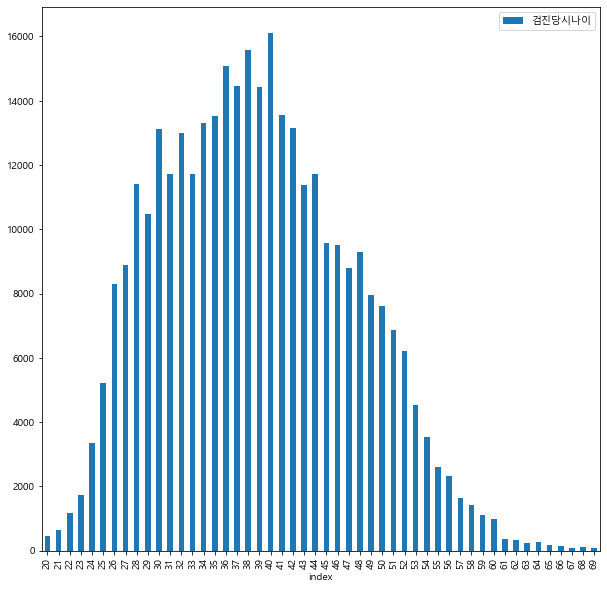

In [361]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [362]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,465
39,21,635
36,22,1164
33,23,1736
30,24,3356
27,25,5228
22,26,8283
20,27,8902
14,28,11394
16,29,10487


# 검진항목 시각화

In [363]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
count,339152.000000,3.391520e+05,3.391520e+05,339152.0,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000,339152.000000
mean,2021.797533,4.836469e+05,1.455853e+06,2.0,38.739087,194.356445,65.815179,113.436869,82.491178,106.819628,107.956453,104.693169,98.735089,104.551096,102.275985
std,1.739423,3.594146e+05,8.151525e+05,0.0,8.449248,31.631867,13.034041,29.042454,39.466229,41.377981,38.719462,40.862498,45.290446,26.138525,13.072840
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,103.000000,21.000000,30.000000,2.000000,0.030000,0.000000,0.100000,0.000000,2.400000,51.000000
25%,2021.000000,2.144140e+05,6.307545e+05,2.0,32.000000,172.000000,56.100000,93.000000,55.000000,78.590000,81.040000,76.320000,63.650000,87.470000,94.000000
50%,2022.000000,3.644215e+05,1.371044e+06,2.0,38.000000,192.000000,65.000000,111.300000,73.000000,121.270000,119.700000,115.930000,110.670000,108.100000,104.000000
75%,2023.000000,8.020475e+05,2.168670e+06,2.0,45.000000,215.000000,75.000000,132.000000,98.000000,142.750000,142.050000,140.590000,140.110000,124.880000,112.000000
max,2024.000000,1.473585e+06,2.871326e+06,2.0,69.000000,295.000000,97.000000,209.200000,268.000000,150.020000,150.150000,150.060000,150.010000,149.990000,125.000000


<AxesSubplot:xlabel='검진당시나이'>

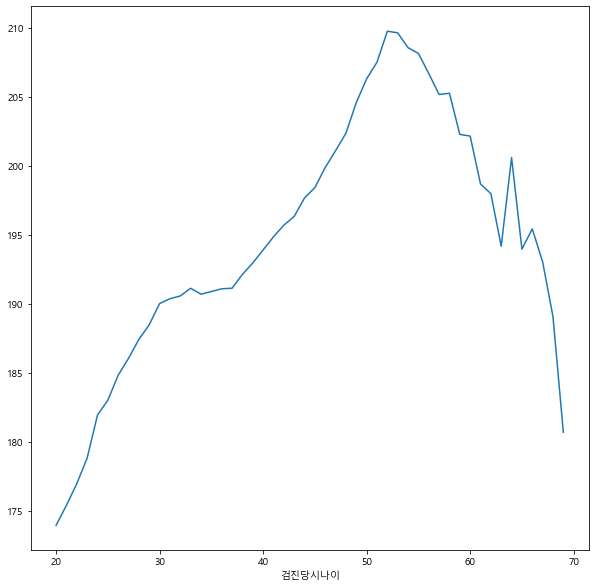

In [364]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

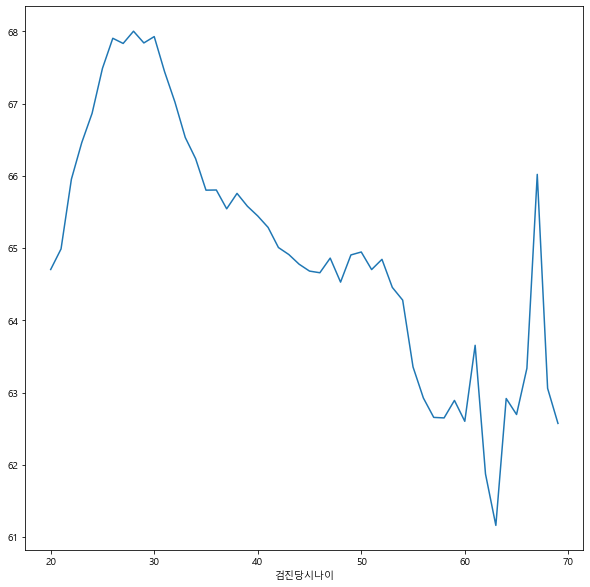

In [365]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

In [366]:
# df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

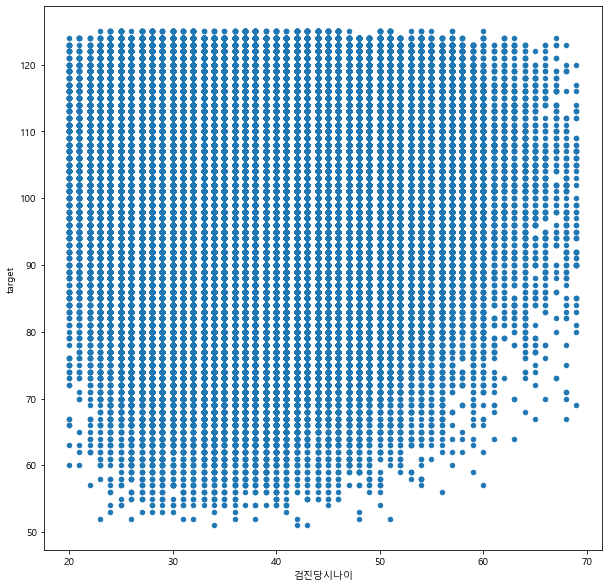

In [367]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

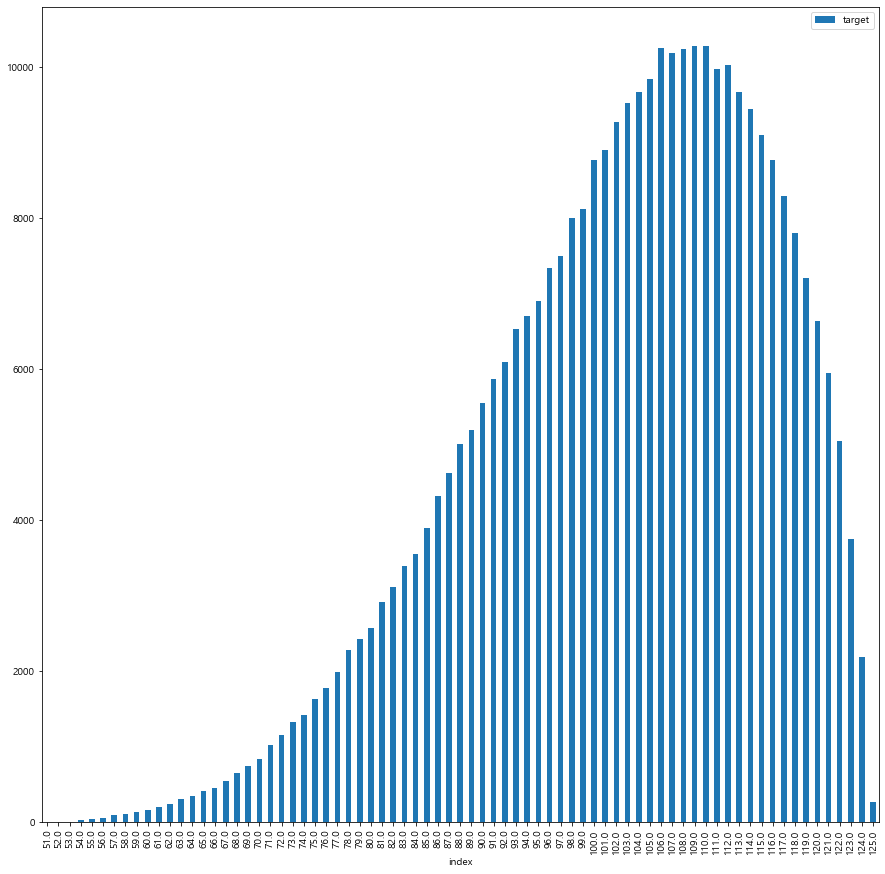

In [368]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [369]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,3
73,52.0,9
72,53.0,9
71,54.0,27
70,55.0,43
69,56.0,63
68,57.0,96
67,58.0,110
66,59.0,136
65,60.0,159


In [370]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [371]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

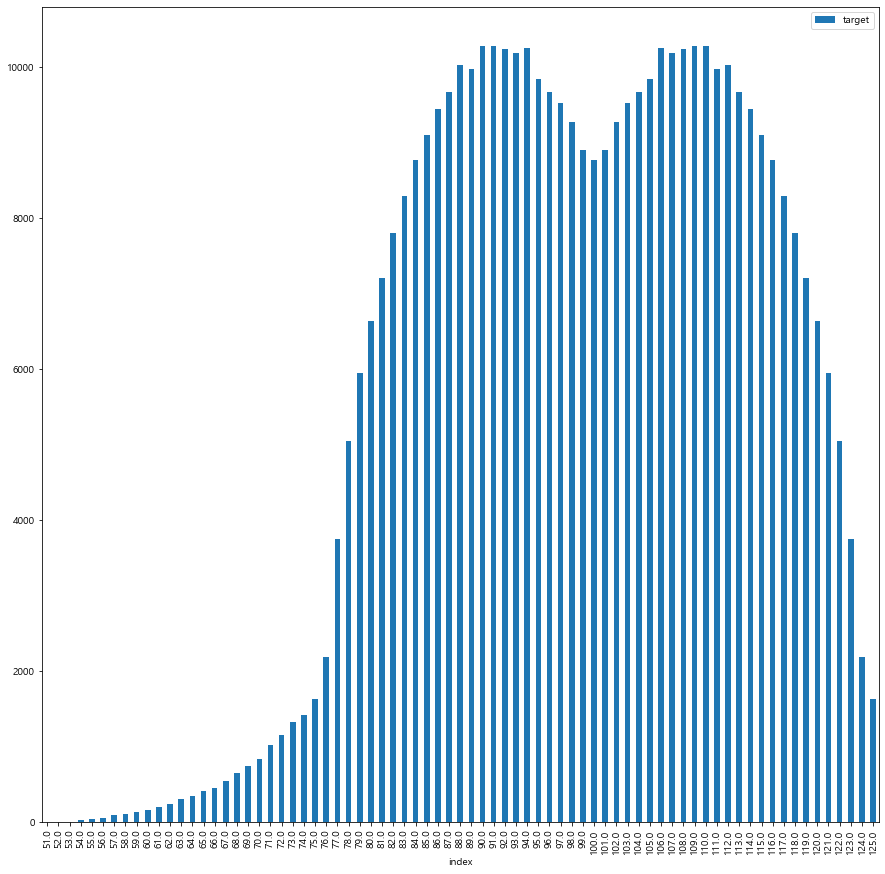

In [372]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [373]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
74,51.0,3
73,52.0,9
72,53.0,9
71,54.0,27
70,55.0,43
69,56.0,63
68,57.0,96
67,58.0,110
66,59.0,136
65,60.0,159


# 나이별 확인하기

In [374]:
# df_woman['검진당시나이'].value_counts()

In [375]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [376]:
# df_woman['검진당시나이'].min()

In [377]:
# df_woman['검진당시나이'].max()

In [378]:
# df_woman.columns

In [379]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [380]:
# df_temp.info()

In [381]:
# df_temp.reset_index(drop=True, inplace=True)

In [382]:
# df_woman = df_temp.copy()

In [383]:
# df_woman['검진당시나이'].value_counts()

In [384]:
# df_woman[df_woman['검진당시나이']==20]

In [385]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [386]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [387]:
train_columns

['검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [388]:
# target_col = '검진당시나이'

In [389]:
target_col

'target'

## Min Max Scaling

In [390]:
from sklearn.preprocessing import MinMaxScaler

In [391]:
scaling_bool

False

In [392]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [393]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [394]:
# model2 = LinearRegression()

In [395]:
# model2.fit(X_train2, y_train2)

In [396]:
# model2.intercept_

In [397]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [398]:
model2 = XGBRegressor()

In [399]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [400]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [401]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1749.16 seconds for 10 candidates parameter settings.


In [402]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [403]:
# best score
random_search.best_score_

-0.5421902371377977

In [404]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [405]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [406]:
# model = build_model()

In [407]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [408]:
# model.summary()

In [409]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [410]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [411]:
# plot_history(history)

## pyTorch 신경망

In [412]:
np.shape(X_train)[1]

5

In [413]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [414]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [415]:
# epochs = 1000

In [416]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [417]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [418]:
# plt.plot(losses)

## coef 계산

In [419]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [420]:
# df_coef2.columns = ['검사항목', 'coef']

In [421]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [422]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [423]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [424]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [425]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [426]:
# slr2 = LinearRegression()

In [427]:
# slr2.fit(X_train2_poly, y_train2)

In [428]:
# np.shape(X_train2)

In [429]:
# np.shape(X_train2_poly)

In [430]:
# np.shape(X_test2)

In [431]:
# np.shape(X_test2_poly)

In [432]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [433]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [434]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [435]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [436]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [437]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [438]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [439]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.5392440310653256
MSE : 0.5069355466090957
RMSE : 0.7119940636052352


In [440]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9972120741646838

In [441]:
model2.score(X_test2, y_test2)

0.9972120741646838

## feature importance

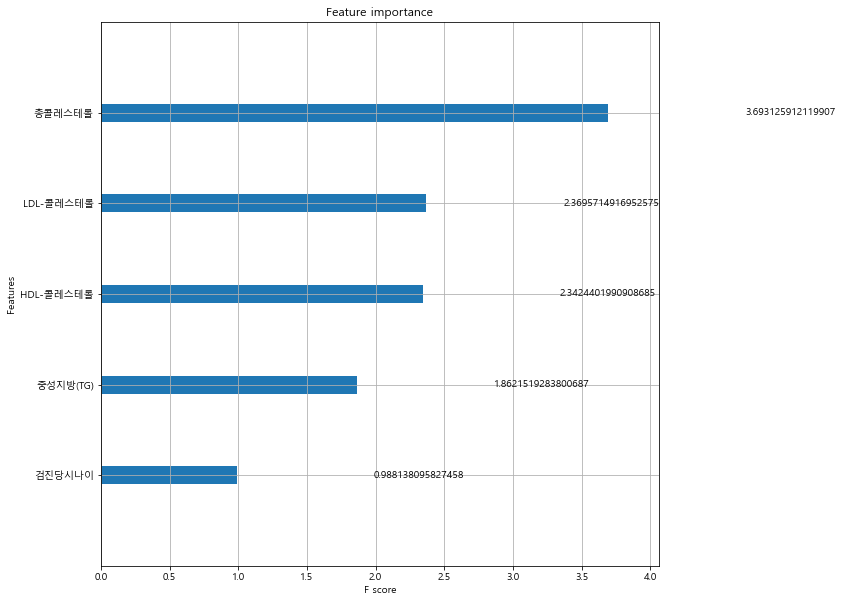

In [442]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [443]:
model2.feature_importances_

array([0.08779214, 0.32811958, 0.2081165 , 0.210527  , 0.1654448 ],
      dtype=float32)

In [444]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [445]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,총콜레스테롤,0.328120
3,LDL-콜레스테롤,0.210527
2,HDL-콜레스테롤,0.208117
4,중성지방(TG),0.165445
0,검진당시나이,0.087792


# 실제나이 - 예측나이 결과

In [446]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [447]:
df_test2.head()

,target,0
0,116.0,115.662460
1,100.0,99.933601
2,104.0,104.422691
3,125.0,124.971169
4,83.0,83.764801


In [448]:
df_test2.columns

Index(['target', 0], dtype='object')

In [449]:
df_test2.columns = ['실제지수', '예측지수']

In [450]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [451]:
df_test2.head()

,실제지수,예측지수,diff
0,116.0,115.662460,-0.337540
1,100.0,99.933601,-0.066399
2,104.0,104.422691,0.422691
3,125.0,124.971169,-0.028831
4,83.0,83.764801,0.764801


In [452]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [453]:
len(df_test2)

106789

In [454]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,116.0,115.662460,-0.337540,-0.0
1,100.0,99.933601,-0.066399,-0.0
2,104.0,104.422691,0.422691,0.0
3,125.0,124.971169,-0.028831,-0.0
4,83.0,83.764801,0.764801,1.0


<AxesSubplot:>

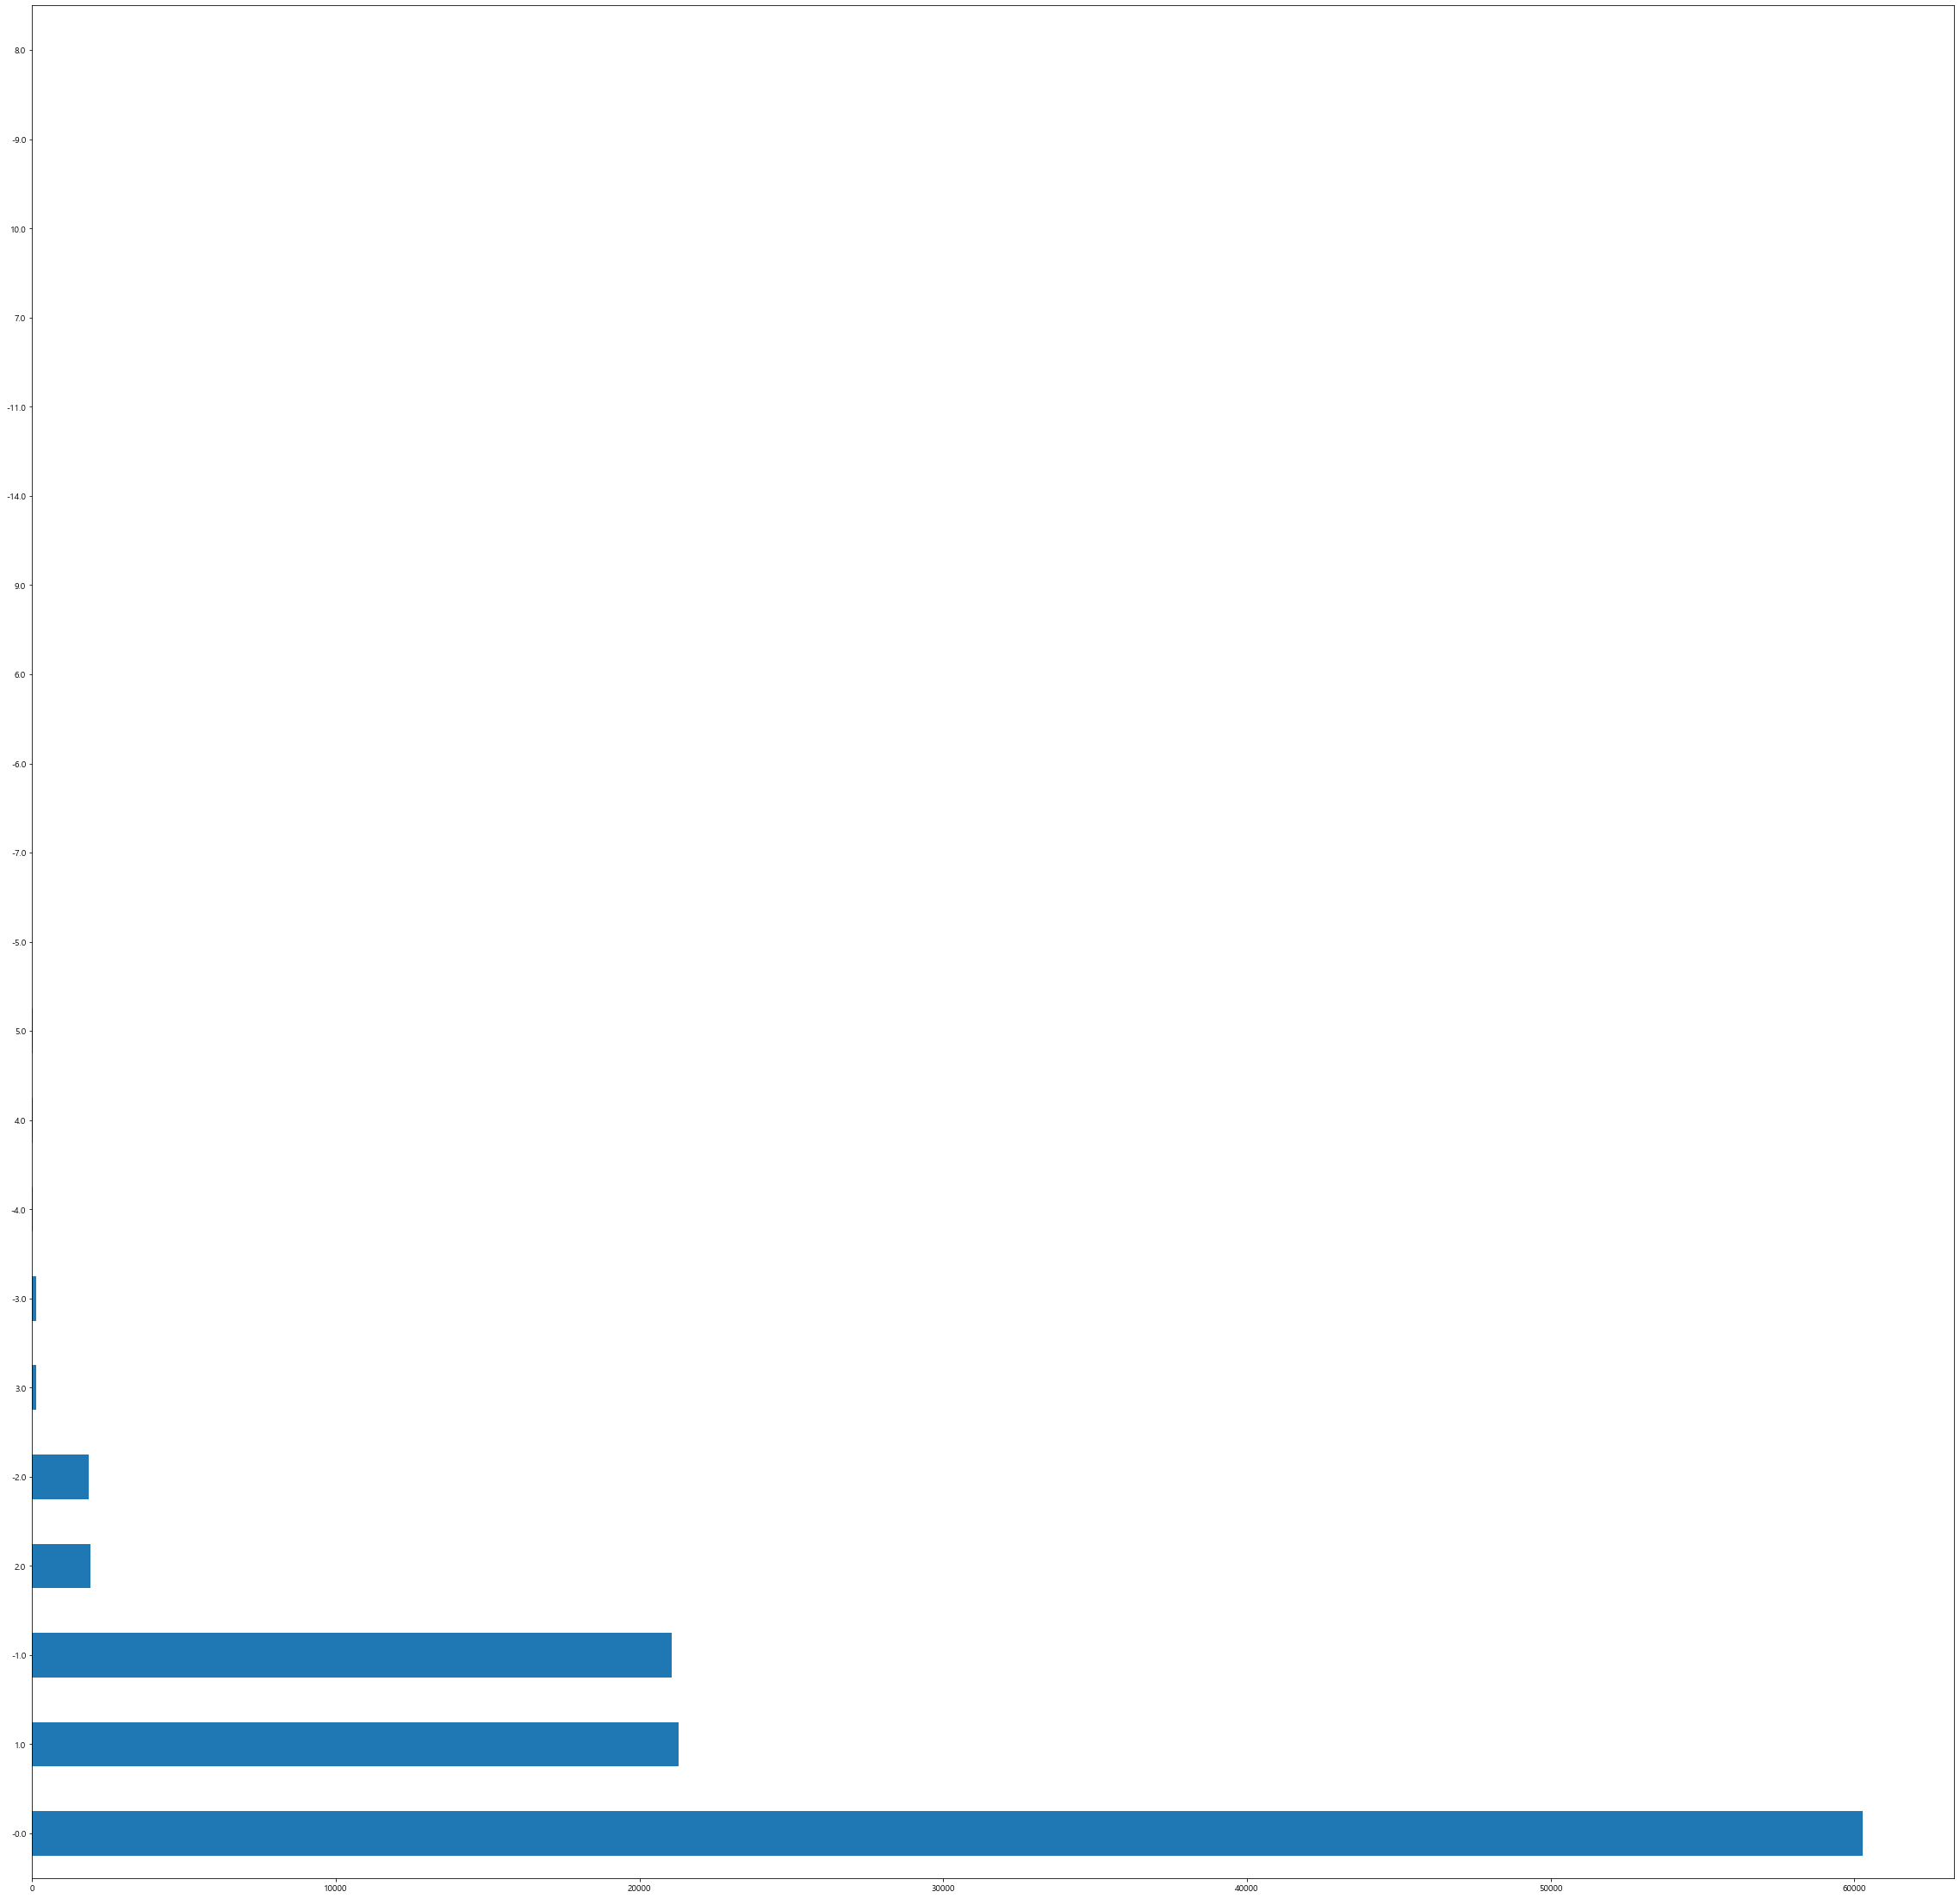

In [455]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [456]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [457]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [458]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [459]:
df_train2.round(0).value_counts()

109.0    7926
90.0     7812
107.0    7771
94.0     7753
93.0     7714
106.0    7640
110.0    7615
111.0    7597
89.0     7586
91.0     7579
108.0    7548
88.0     7527
92.0     7511
96.0     7477
112.0    7406
105.0    7396
113.0    7343
95.0     7335
87.0     7276
104.0    7210
103.0    7078
114.0    7057
97.0     7031
102.0    7000
86.0     6993
98.0     6925
85.0     6905
115.0    6873
116.0    6702
99.0     6690
101.0    6663
84.0     6520
83.0     6425
100.0    6390
117.0    6204
118.0    5850
82.0     5769
119.0    5409
81.0     5299
80.0     5088
120.0    5004
79.0     4481
121.0    4437
122.0    3698
78.0     3667
77.0     2785
123.0    2775
124.0    1875
76.0     1629
75.0     1308
125.0    1069
74.0     1027
73.0     1016
72.0      822
71.0      754
70.0      652
69.0      531
68.0      527
67.0      423
66.0      348
65.0      309
64.0      246
63.0      241
62.0      174
61.0      166
59.0      120
60.0      110
57.0       73
58.0       72
56.0       44
55.0       32
54.0  

In [460]:
y_test2.value_counts()

110.0    2634
109.0    2601
91.0     2590
92.0     2589
90.0     2587
108.0    2581
106.0    2563
94.0     2545
93.0     2545
111.0    2534
107.0    2514
112.0    2487
95.0     2464
87.0     2457
97.0     2447
88.0     2442
113.0    2437
89.0     2420
96.0     2410
105.0    2408
104.0    2395
86.0     2389
103.0    2350
114.0    2328
98.0     2295
102.0    2295
85.0     2266
100.0    2265
99.0     2250
115.0    2249
101.0    2240
84.0     2211
116.0    2181
83.0     2094
117.0    2057
82.0     1984
118.0    1875
81.0     1844
119.0    1744
80.0     1645
120.0    1630
121.0    1521
79.0     1481
122.0    1253
78.0     1236
123.0     963
77.0      956
124.0     573
76.0      537
125.0     420
74.0      379
75.0      375
73.0      355
72.0      302
71.0      245
70.0      205
69.0      183
68.0      149
67.0      137
66.0      123
65.0      120
64.0       90
63.0       71
62.0       62
61.0       52
60.0       34
59.0       31
58.0       29
57.0       27
56.0       17
55.0       11
53.0  

In [461]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [462]:
df_plot.columns = ['count']

In [463]:
df_plot.reset_index(inplace=True)

In [464]:
df_plot = df_plot.sort_values('index', ascending=True)

In [465]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

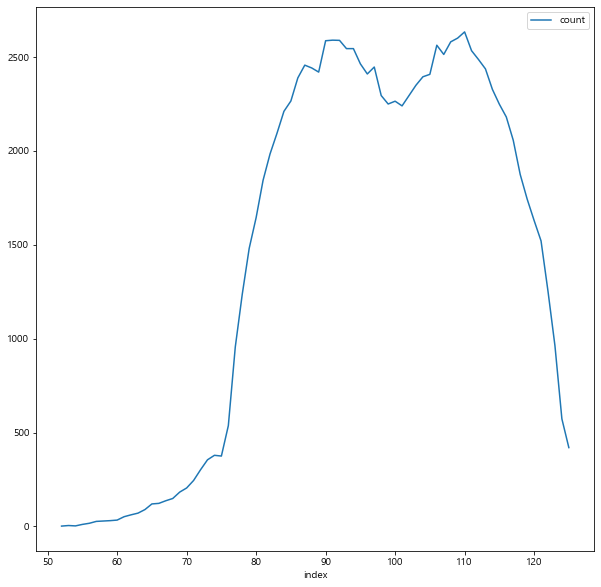

In [466]:
df_plot.plot()

In [467]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [468]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [469]:
df_test2.round(0).value_counts()

90.0     2637
109.0    2635
92.0     2628
110.0    2609
106.0    2607
107.0    2600
111.0    2570
108.0    2565
94.0     2557
91.0     2533
113.0    2502
96.0     2499
97.0     2488
89.0     2474
87.0     2452
93.0     2450
112.0    2425
88.0     2421
95.0     2415
104.0    2370
114.0    2365
105.0    2357
85.0     2337
86.0     2322
103.0    2315
102.0    2298
99.0     2292
98.0     2278
115.0    2271
101.0    2206
84.0     2192
83.0     2179
100.0    2150
116.0    2137
117.0    2046
82.0     2021
118.0    1870
81.0     1768
119.0    1736
80.0     1679
120.0    1645
79.0     1498
121.0    1473
122.0    1268
78.0     1199
123.0     932
77.0      905
124.0     646
76.0      553
75.0      418
125.0     389
74.0      368
73.0      345
72.0      285
71.0      264
70.0      191
69.0      183
68.0      164
67.0      132
65.0      119
66.0      112
63.0       85
64.0       78
62.0       66
61.0       53
60.0       37
58.0       35
59.0       27
57.0       24
56.0       15
126.0       7
55.0  

In [470]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [471]:
df_plot2.columns = ['count']

In [472]:
df_plot2.reset_index(inplace=True)

In [473]:
df_plot2

,0,count
0,90.0,2637
1,109.0,2635
2,92.0,2628
3,110.0,2609
4,106.0,2607
5,107.0,2600
6,111.0,2570
7,108.0,2565
8,94.0,2557
9,91.0,2533


In [474]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [475]:
df_plot2.set_index(0, inplace=True)

In [476]:
df_plot2

,count
0,
52.0,2
53.0,1
54.0,7
55.0,7
56.0,15
57.0,24
58.0,35
59.0,27
60.0,37


<AxesSubplot:xlabel='0'>

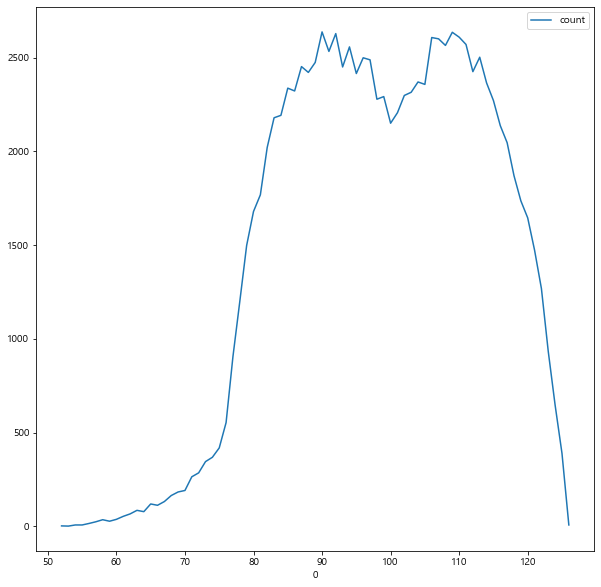

In [477]:
df_plot2.plot()

# 시각화

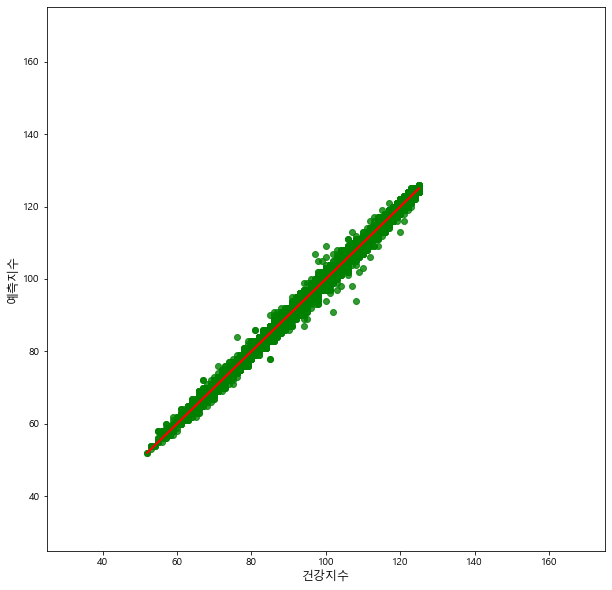

In [478]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [479]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
0,2021,53,2632765,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0
1,2024,53,2658222,2,29,176.0,82.0,79.0,76.0,144.46,89.57,89.19,108.65,107.97,104.0
2,2020,54,497669,2,30,212.0,79.0,119.0,68.0,107.31,110.31,118.17,140.21,119.00,110.0
3,2022,54,1319859,2,32,246.0,81.0,155.0,50.0,33.21,85.55,35.81,137.22,72.95,86.0
4,2023,54,2039511,2,33,212.0,73.0,124.0,72.0,106.55,123.38,111.22,127.58,117.18,109.0


In [480]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339152 entries, 0 to 339151
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           339152 non-null  int64  
 1   UID            339152 non-null  int64  
 2   CU_REC_ID      339152 non-null  int64  
 3   SEX            339152 non-null  int64  
 4   검진당시나이         339152 non-null  int64  
 5   총콜레스테롤         339152 non-null  float64
 6   HDL-콜레스테롤      339152 non-null  float64
 7   LDL-콜레스테롤      339152 non-null  float64
 8   중성지방(TG)       339152 non-null  float64
 9   총콜레스테롤_kde     339152 non-null  float64
 10  HDL-콜레스테롤_kde  339152 non-null  float64
 11  LDL-콜레스테롤_kde  339152 non-null  float64
 12  중성지방(TG)_kde   339152 non-null  float64
 13  kde_mean       339152 non-null  float64
 14  target         339152 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 38.8 MB


In [481]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target
74330,2021,196909,2495703,2,28,140.0,65.0,61.0,70.0,44.32,149.97,32.64,121.92,87.21,94.0
74331,2022,196909,2495702,2,29,144.0,61.0,72.0,53.0,46.11,144.85,60.75,144.77,99.12,100.0
74332,2023,196909,2495700,2,30,142.0,66.0,61.0,76.0,42.81,147.47,30.08,119.85,85.05,93.0
74333,2024,196909,2495697,2,31,146.0,62.0,74.0,49.0,55.29,144.55,75.90,139.28,103.76,102.0


In [482]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [483]:
len(df_pred2)

339152

In [484]:
df_pred2.reset_index(drop=True, inplace=True)

In [485]:
X_test2

,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
31771,36,186.0,61.00,117.00,40.00
36866,42,218.0,58.00,114.00,231.00
179796,21,162.0,65.96,113.39,82.48
196919,40,185.0,63.00,110.00,59.00
217429,39,142.0,43.00,83.00,82.00
...,...,...,...,...,...
105807,43,203.0,38.00,113.00,258.00
113943,36,122.0,51.00,63.00,94.00
13598,48,230.0,75.00,142.00,65.00
247988,34,252.0,74.00,165.00,50.00


In [486]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)', '총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde',
       '중성지방(TG)_kde', 'kde_mean', 'target'],
      dtype='object')

In [487]:
df_pred2[train_columns]

,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,26,175.0,70.0,92.0,63.0
1,29,176.0,82.0,79.0,76.0
2,30,212.0,79.0,119.0,68.0
3,32,246.0,81.0,155.0,50.0
4,33,212.0,73.0,124.0,72.0
...,...,...,...,...,...
339147,47,213.0,73.0,120.0,101.0
339148,50,228.0,56.0,155.0,85.0
339149,57,152.0,60.0,71.0,107.0
339150,35,233.0,75.0,140.0,89.0


In [488]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [489]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [490]:
pred_data2

array([122.83794 , 104.28307 , 109.723305, ..., 101.86177 ,  89.65473 ,
       120.87303 ], dtype=float32)

In [491]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [492]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [493]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0,122.837936
1,2024,53,2658222,2,29,176.0,82.0,79.0,76.0,144.46,89.57,89.19,108.65,107.97,104.0,104.283073
2,2020,54,497669,2,30,212.0,79.0,119.0,68.0,107.31,110.31,118.17,140.21,119.00,110.0,109.723305
3,2022,54,1319859,2,32,246.0,81.0,155.0,50.0,33.21,85.55,35.81,137.22,72.95,86.0,85.984406
4,2023,54,2039511,2,33,212.0,73.0,124.0,72.0,106.55,123.38,111.22,127.58,117.18,109.0,108.386055
5,2024,54,2750990,2,34,231.0,80.0,129.0,110.0,50.82,76.31,95.93,45.62,67.17,84.0,83.990417
6,2022,56,1351361,2,33,165.0,64.0,90.0,53.0,118.57,138.76,115.60,145.91,129.71,115.0,115.115440
7,2023,56,2032999,2,34,209.0,75.0,127.0,37.0,115.10,101.25,100.44,71.65,97.11,99.0,98.492050
8,2021,59,701026,2,29,215.0,62.0,130.0,117.0,81.00,145.62,76.19,24.19,81.75,91.0,91.475685
9,2022,59,1376992,2,30,183.0,65.0,99.0,96.0,146.23,147.44,149.99,63.20,126.71,113.0,112.903603


## 예측지수 성능평가

In [494]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.5405880256368849

# target으로 나이 계산

In [495]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [496]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0,122.837936,21.43
1,2024,53,2658222,2,29,176.0,82.0,79.0,76.0,144.46,89.57,89.19,108.65,107.97,104.0,104.283073,28.14
2,2020,54,497669,2,30,212.0,79.0,119.0,68.0,107.31,110.31,118.17,140.21,119.00,110.0,109.723305,28.06
3,2022,54,1319859,2,32,246.0,81.0,155.0,50.0,33.21,85.55,35.81,137.22,72.95,86.0,85.984406,34.80
4,2023,54,2039511,2,33,212.0,73.0,124.0,72.0,106.55,123.38,111.22,127.58,117.18,109.0,108.386055,31.32
5,2024,54,2750990,2,34,231.0,80.0,129.0,110.0,50.82,76.31,95.93,45.62,67.17,84.0,83.990417,37.20
6,2022,56,1351361,2,33,165.0,64.0,90.0,53.0,118.57,138.76,115.60,145.91,129.71,115.0,115.115440,29.98
7,2023,56,2032999,2,34,209.0,75.0,127.0,37.0,115.10,101.25,100.44,71.65,97.11,99.0,98.492050,34.30
8,2021,59,701026,2,29,215.0,62.0,130.0,117.0,81.00,145.62,76.19,24.19,81.75,91.0,91.475685,30.70
9,2022,59,1376992,2,30,183.0,65.0,99.0,96.0,146.23,147.44,149.99,63.20,126.71,113.0,112.903603,27.42


## 예측나이 성능평가

In [497]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.202690445581922

# 최종 산출

In [498]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),총콜레스테롤_kde,HDL-콜레스테롤_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,175.0,70.0,92.0,63.0,142.74,146.38,149.17,141.14,144.86,122.0,122.837936,21.43
1,2024,53,2658222,2,29,176.0,82.0,79.0,76.0,144.46,89.57,89.19,108.65,107.97,104.0,104.283073,28.14
2,2020,54,497669,2,30,212.0,79.0,119.0,68.0,107.31,110.31,118.17,140.21,119.00,110.0,109.723305,28.06
3,2022,54,1319859,2,32,246.0,81.0,155.0,50.0,33.21,85.55,35.81,137.22,72.95,86.0,85.984406,34.80
4,2023,54,2039511,2,33,212.0,73.0,124.0,72.0,106.55,123.38,111.22,127.58,117.18,109.0,108.386055,31.32


# DataMart csv

In [499]:
df_copy = df.copy()

In [500]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
0,2010,7282,2520,1,42,224.0,73.0,139.0,98.0
1,2010,7490,3638,1,39,265.0,57.0,187.4,103.0
2,2010,7915,3997,1,36,196.0,37.0,50.0,547.0
3,2010,8056,4745,1,42,310.0,53.0,181.4,378.0
4,2010,8457,3929,1,38,189.0,50.0,108.0,154.0


In [501]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   검진년도       1213899 non-null  int64  
 1   UID        1213899 non-null  int64  
 2   CU_REC_ID  1213899 non-null  int64  
 3   SEX        1213899 non-null  int64  
 4   검진당시나이     1213899 non-null  int64  
 5   총콜레스테롤     1151191 non-null  float64
 6   HDL-콜레스테롤  1146478 non-null  float64
 7   LDL-콜레스테롤  1141538 non-null  float64
 8   중성지방(TG)   1147041 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 83.4 MB


In [502]:
minimums

[103.0, 17.0, 29.5, -52.0]

In [503]:
maximums

[295.0, 97.0, 209.5, 268.0]

In [504]:
train_columns

['검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [505]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [506]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [507]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [508]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG)
10,2010,15894,2533,2,29,160.0,75.0,74.0,55.0
22,2010,42223,1364,2,24,178.0,68.0,99.0,55.0
37,2011,364096,6645,2,32,172.0,71.0,NaN,53.0
45,2010,120518,3595,2,30,265.0,95.0,150.0,100.0
63,2011,698706,6600,2,36,191.0,59.0,NaN,112.0


## 검진 항목 all 결측치 지우기

In [509]:
target_cols

['총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)']

In [510]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [511]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [512]:
len(df_woman_csv)

422248

## fillna

In [513]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)', '총콜레스테롤_kde', 'HDL-콜레스테롤_kde', 'LDL-콜레스테롤_kde',
       '중성지방(TG)_kde', 'kde_mean', 'target'],
      dtype='object')

In [514]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '총콜레스테롤', 'HDL-콜레스테롤',
       'LDL-콜레스테롤', '중성지방(TG)'],
      dtype='object')

In [515]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 모델 예측

In [516]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [517]:
pred_data2 = pred_data2.round(0)

In [518]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [519]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수
0,2010,15894,2533,2,29,160.0,75.0,74.00,55.0,107.0
1,2010,42223,1364,2,24,178.0,68.0,99.00,55.0,123.0
2,2011,364096,6645,2,32,172.0,71.0,113.44,53.0,119.0
3,2010,120518,3595,2,30,265.0,95.0,150.00,100.0,67.0
4,2011,698706,6600,2,36,191.0,59.0,113.44,112.0,111.0


### 성능 평가

In [520]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [521]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [522]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [523]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.269837630965689


In [524]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.8948408640205822

In [525]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
0,2010,15894,2533,2,29,160.0,75.0,74.00,55.0,107.0,27.6
1,2010,42223,1364,2,24,178.0,68.0,99.00,55.0,123.0,19.4
2,2011,364096,6645,2,32,172.0,71.0,113.44,53.0,119.0,28.2
3,2010,120518,3595,2,30,265.0,95.0,150.00,100.0,67.0,36.6
4,2011,698706,6600,2,36,191.0,59.0,113.44,112.0,111.0,33.8


In [526]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422248 entries, 0 to 422247
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   검진년도       422248 non-null  int64  
 1   UID        422248 non-null  int64  
 2   CU_REC_ID  422248 non-null  int64  
 3   SEX        422248 non-null  int64  
 4   검진당시나이     422248 non-null  int64  
 5   총콜레스테롤     422248 non-null  float64
 6   HDL-콜레스테롤  422248 non-null  float64
 7   LDL-콜레스테롤  422248 non-null  float64
 8   중성지방(TG)   422248 non-null  float64
 9   예측지수       422248 non-null  float32
 10  예측나이       422248 non-null  float64
dtypes: float32(1), float64(5), int64(5)
memory usage: 33.8 MB


# 최종 UID별 확인

In [527]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
115590,2021,261581,806568,2,50,228.0,49.0,165.0,72.0,99.0,50.2
115598,2021,261581,2243879,2,50,228.0,49.0,165.0,72.0,99.0,50.2
115599,2021,261581,2418909,2,50,228.0,49.0,165.0,72.0,99.0,50.2
115600,2021,261581,2418910,2,50,228.0,49.0,165.0,72.0,99.0,50.2
177206,2022,261581,751339,2,51,206.0,38.0,134.0,172.0,93.0,52.4
177209,2022,261581,2243878,2,51,206.0,38.0,134.0,172.0,93.0,52.4
268311,2023,261581,1519764,2,52,228.0,50.0,152.0,128.0,99.0,52.2
268312,2023,261581,2243877,2,52,228.0,50.0,152.0,128.0,99.0,52.2
387868,2024,261581,2418911,2,53,215.0,50.0,142.0,116.0,111.0,50.8


In [528]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
60545,2022,477944,956268,2,31,135.0,60.0,49.0,130.0,75.0,36.0
208822,2022,477944,2212776,2,31,135.0,60.0,49.0,130.0,75.0,36.0
312613,2023,477944,1454346,2,32,170.0,75.0,73.0,109.0,98.0,32.4
312614,2023,477944,2212775,2,32,170.0,75.0,73.0,109.0,98.0,32.4
400252,2024,477944,2362855,2,33,164.0,80.0,65.0,93.0,88.0,35.4


In [529]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),예측지수,예측나이
338100,2023,896916,1459636,2,28,178.0,79.0,85.0,71.0,112.0,25.6
338089,2023,896916,1842092,2,28,178.0,79.0,85.0,71.0,112.0,25.6
338101,2023,896916,2031853,2,28,178.0,79.0,85.0,71.0,112.0,25.6
338102,2023,896916,2253054,2,28,178.0,79.0,85.0,71.0,112.0,25.6
332264,2023,896916,2257188,2,28,178.0,79.0,85.0,71.0,112.0,25.6
411120,2024,896916,2253058,2,29,150.0,63.0,79.0,42.0,101.0,28.8


# 최종 CSV 병합 Extract

In [530]:
len(df_man_csv)

729932

In [531]:
len(df_woman_csv)

422248

In [532]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [533]:
df_csv.to_csv(csv_path)